# Logistic Regression Modeling Performance Assessment

### John Foster
### Department of Information Technology, Western Governors University
### D208: Predictive Modeling
### Professor Eric Straw
### May 1, 2023

### A1: RESEARCH QUESTION

The research question I have decided to pursue using the churn dataset is as follows: "Across a hand-selected subset of relevant variables in the dataset, which variables contribute most significantly to a customer's termination of service in a given month?" In effect, the purpose of this question is to extract various predictive features from the dataset, and to examine these predictive factors to determine if any marketing or operational strategies should be adjusted or focused on these predictive factors in order to prevent customers discontinuing service. This research question could best be viewed as a component of a churn analysis.

### A2: GOALS

The primary goal of this analysis is to utilize a logistic regression model to determine which among our chosen list of features included in the dataset are significant predictors of a customer's decision to discontinue service, represented in the Yes/No value of a given row's Churn column. However, we will have several secondary goals to satisfy along the way. First, we will clean our dataset by treating for duplicates, nullity, and outliers. Next, we will select our independent variables to include in our analysis. After selecting our independent variables, we will explore them in depth utilizing descriptive statistics, univariate statistical visualizations, and bivariate visualizations that explore the relationship between our selected independent variable and our dependent variable (Churn). We will next move onto encoding our selected categorical variables so that they can be used in our logistic regression analysis.

Once all of the data is prepared as described above, we will begin our analysis. To do that, we will first address issues of multicollinearity. To address this, we will evaluate our independent variables for their respective Variance Inflation Factors (VIF), dropping the highest value before re-evaluating the remaining features' VIFs once again. We will repeat this loop until all remaining features have low enough VIF's to conclude that we have hopefully solved for multicollinearity. Next, we can perform our initial logistic regression on the remaining features. The results of this regression will be compared with our reduced model at the end of the process. To create our reduced model, we will evaluate the p-values of our independent variables, drop the feature with the largest one, and run a logistic regression with the remaining features for re-evaluation. We will repeat this step until no features remain with a p-value above .05. At this point, we will perform a logistic regression one last time, explore the results by producing a confusion matrix and accuracy calculation, and then compare the Pseudo R Squared values of our initial and reduced models. These steps will allow us to determine if the methodology of our analysis is effective in answering our research question, and lead us to recommend organizational action.

### B1: SUMMARY OF ASSUMPTIONS

The efficacy of logistic regression in performing this type of predictive analysis depends on many different factors. However, there are four primary assumptions that must be adhered to in order to ensure that the results of a logistic regression are statistically sound. The first assumption is that logistic regressions are based on Bernoulli distributions rather than gaussian distributions. This is due to the fact that our dependent variable (Churn, in our case), is binary rather than numeric. The second assumption relates to the first, in that the predictions indicated by a formula using logistic regression are bound to a range of nominal values. In our case, these would be 'Yes' and 'No', but this could also include variables with more than 2 unique values. Third, unlike a multiple linear regression (MLR), a logistic regression predicts the probability of a given outcome occurring rather than predicting the actual outcome. This means that it does not produce residuals in the same way that an MLR does, because any predictions made are either true or false based on whether it calculates the probability of the given outcome to be equal to or greater than 50%. Last, logistic regression returns the logarithm of the odds of achieving 1, meaning, as described above, that it returns a percentage value of how likely a given prediction is ('Yes', in our analysis) (Sewell, 2022).

### B2: TOOL BENEFITS

I have chosen to use Python over R to perform this analysis for two main reasons. First, my own familiarity with Python programming allows me to construct more advanced loops and contextual processes to generalize processes so that they can be performed on a wide array of analyses. This enables me to adapt code created for previous classes in order to solve problems that arise in my current analysis. This familiarity also makes the process of debugging code snippets far simpler and faster, as I already have a grasp over the data types and structures utilized in the core language and in commonly used libraries relevant to data analytics, such as pandas, numpy, and matplotlib. The second reason I am prioritizing development in Python over R is that R has a primary focus on statistical and graphical analysis. There are various R packages that can be accessed to expand its utility, but Python largely outshines R as a general-purpose programming language. This means that any processes in the data analytics journey not directly related to statistics or mathematics (such as data) can be more cleanly executed in script, and the results associated with these processes can be performed on and rolled into bespoke class objects if we decide that we would like to standardize them, automate them in a pipeline, or develop advanced tooling relevant to the domain knowledge associated with different datasets and sources. Essentially, Python gives us a tremendous number of options in satisfying the goals of our analysis, which allows us to revise our approach more easily if our analysis proves ineffective at answering our research question.

### B3: APPROPRIATE TECHNIQUE

Logistic regression is an appropriate method to analyze our research question. First, logistic is, by definition, a technique whereby multiple independent variables (both numeric and categorical) are evaluated for their predictive relationship with a categorical variable. Our research question is: "Across a hand-selected subset of relevant variables in the dataset, which variables contribute most significantly to a customer's termination of service in a given month?" In our example, our hand-selected subset of relevant variables are our multiple independent variables, and a customer's decision to discontinue service iin the past month (Churn) is our dependent variable. Our independent variables will include numeric and categorical variables from the dataset, and our dependent variable, Churn, is a binary categorical variable. Although this does not guarantee that our analysis will yield a conclusive answer to our research question, it may illustrate the correct questions that we should ask when developing future analyses toward that end.

### C1: DATA CLEANING

While the provided dataset has been identified as already cleaned, we will nonetheless execute several processes to ensure that it is ready for analysis. We have three primary goals for our data cleaning process, but in the context of this analysis, we will also perform a few extra steps to provide us with a final list of appropriate features to include in our analysis. The first primary goal is to detect and treat any duplicates in our dataset. To do this, we will simply drop any duplicates detected, and then use assertion statements to ensure that no duplicates remain. The second goal is to detect and treat any null values in the dataset. If any null values are detected, we will drop the associated observation (row) from the dataset. Once that is complete, we will again use an assertion to prove that no nullity remains. Last, we will analyze our quantitative features for outliers by evaluating features and assigning their values z-scores in a separate dataframe. We will filter for z-scores above 3 or below -3 and impute the corresponding values in their respective features in the original dataframe using the median value of that feature so that the outliers cannot distort the results of our analysis. Once our three primary goals are satisfied, we will then explore our columns and select the appropriate independent variables that we believe may exhibit a correlation with our dependent variable, and construct a complete cleaned dataframe from those features before moving forward with an exploratory analysis of our data. 

The following code snippets will accomplish our data cleaning. In the interest of continuity, the below code will also include several snippets and steps necessary for the performance of the remainder of our analysis so that the entire analysis can be executed and demonstrated in sequence.

In [271]:
#Import the libraries that we need for our analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [272]:
#A simple variable to show or hide graphical visualizations for debugging purposes.
show_vis = 'y'

LOGx = True

#Select which type of regression we are performing; Multiple Linear Regression or Logistic Regression.
MLR_or_LR = 'LR'

if MLR_or_LR == 'LR':
    LOGx = False

In [273]:
#Import the churn dataset from the source csv file and make a dataframe out of it.
raw_df = pd.read_csv('churn_clean.csv')

#Make a copy of the imported dataframe in case we would like to inspect or manipulate the raw data. 
df = raw_df.copy()
#Create a list of all column names in the dataframe
df_cols = df.columns.to_list()

In [274]:
#Use the .info() function to return information about each variable in the dataframe for ease of reference.
#Note: This produces a very long output, but is a useful reference when initially interacting with a dataset.

for col in df.columns:
    print('---')
    print('Variable name: ' + df[col].name)
    print('Data type: ' + str(df[col].dtype))
    i = df[col].values
    print('Example values: ' + str(i))

---
Variable name: CaseOrder
Data type: int64
Example values: [    1     2     3 ...  9998  9999 10000]
---
Variable name: Customer_id
Data type: object
Example values: ['K409198' 'S120509' 'K191035' ... 'I243405' 'I641617' 'T38070']
---
Variable name: Interaction
Data type: object
Example values: ['aa90260b-4141-4a24-8e36-b04ce1f4f77b'
 'fb76459f-c047-4a9d-8af9-e0f7d4ac2524'
 '344d114c-3736-4be5-98f7-c72c281e2d35' ...
 'e8307ddf-9a01-4fff-bc59-4742e03fd24f'
 '3775ccfc-0052-4107-81ae-9657f81ecdf3'
 '9de5fb6e-bd33-4995-aec8-f01d0172a499']
---
Variable name: UID
Data type: object
Example values: ['e885b299883d4f9fb18e39c75155d990' 'f2de8bef964785f41a2959829830fb8a'
 'f1784cfa9f6d92ae816197eb175d3c71' ... '9c41f212d1e04dca84445019bbc9b41c'
 '3e1f269b40c235a1038863ecf6b7a0df' '0ea683a03a3cd544aefe8388aab16176']
---
Variable name: City
Data type: object
Example values: ['Point Baker' 'West Branch' 'Yamhill' ... 'Mobeetie' 'Carrollton'
 'Clarkesville']
---
Variable name: State
Data type: obj

In [275]:
#Drop any duplicate rows from the dataframe
print(df.duplicated().value_counts())
df.drop_duplicates(inplace=True)
#Check for duplicates using assertion statements on columns purported to contain unique values.
#This is a more in-depth approach to ensure that no duplicates remain.
assert df['Customer_id'].duplicated().all() == False
assert df['Interaction'].duplicated().all() == False

False    10000
dtype: int64


In [276]:
#Make a list out of the names of the columns that have missing data.
missing_cols = df.columns[df.isnull().any()].to_list()
print(missing_cols)
#Drop any rows containing nullity
df.dropna(how='all')
assert len(missing_cols) == 0


[]


In [277]:
#Make a list out of the numeric columns that we will be evaluating for outliers.
num_cols = ['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

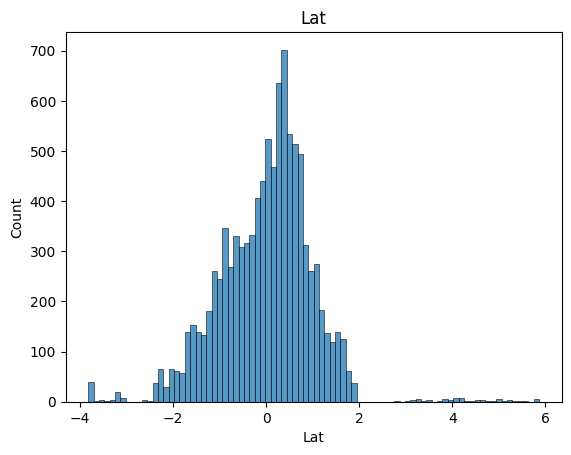

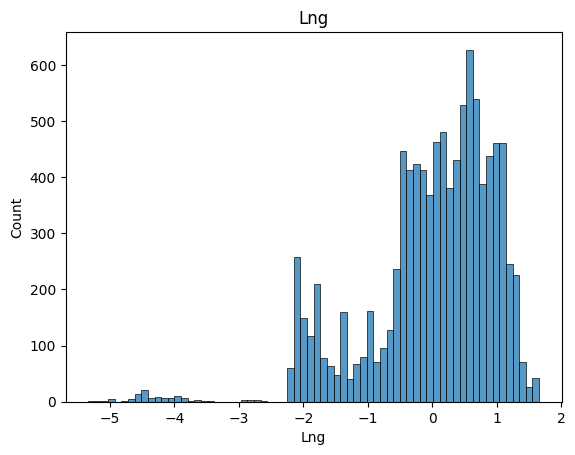

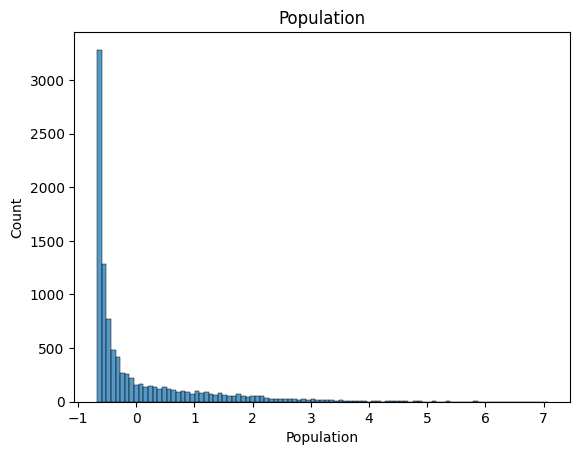

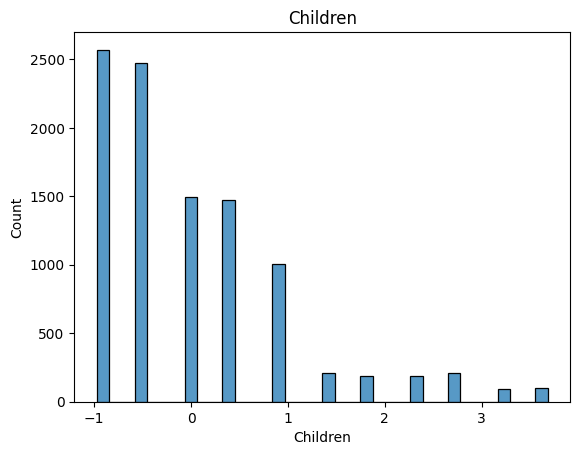

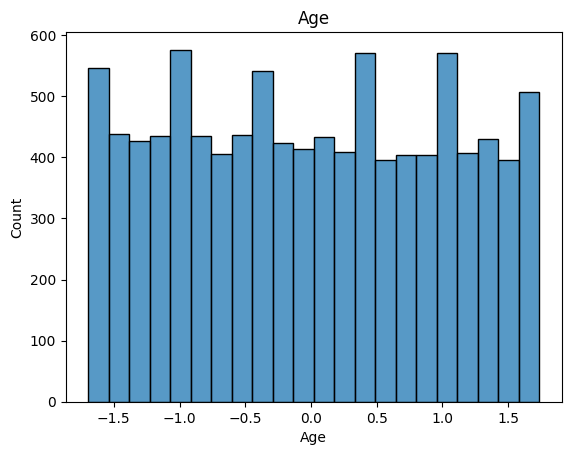

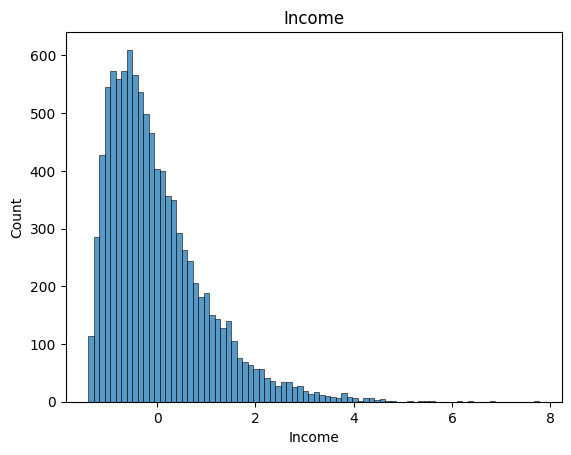

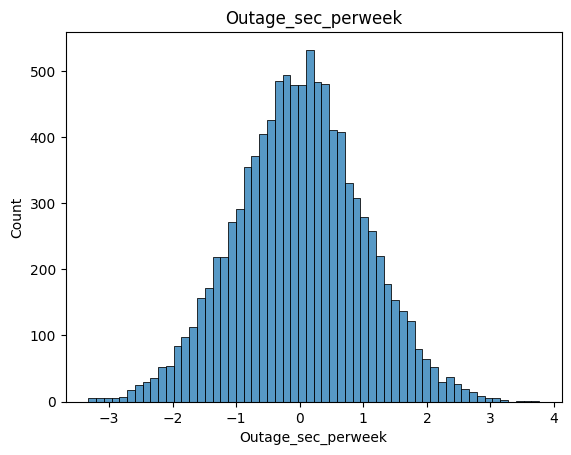

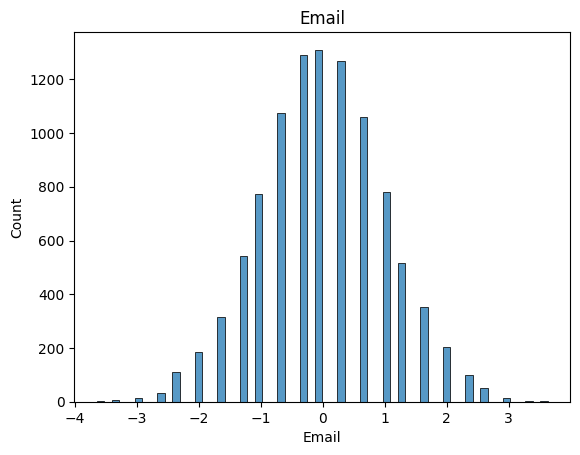

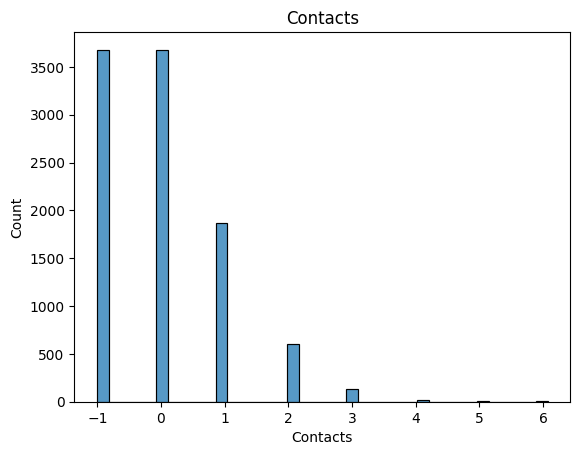

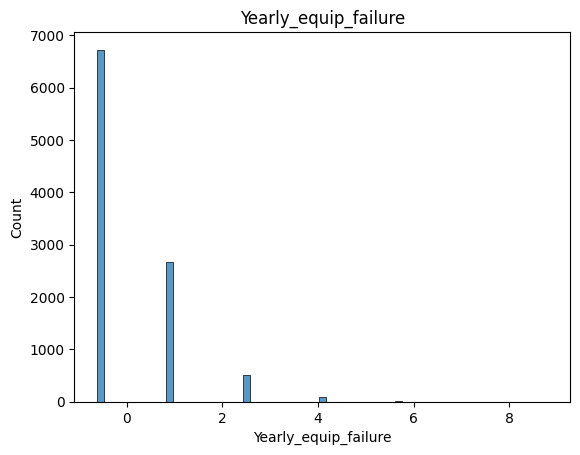

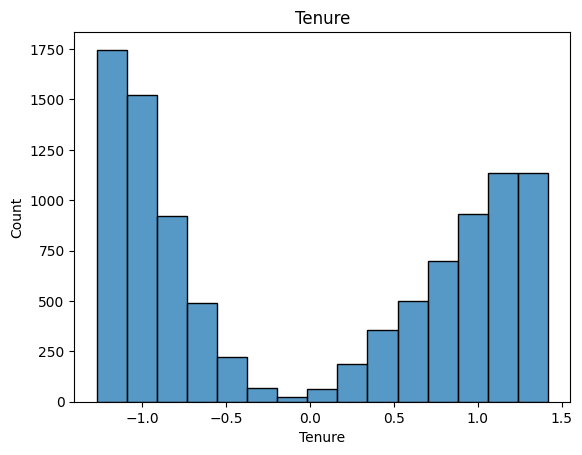

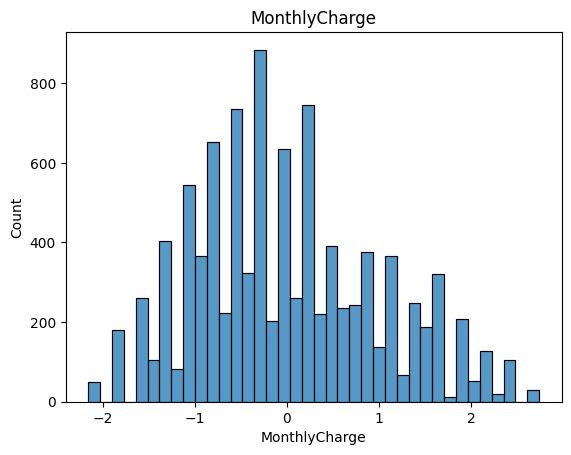

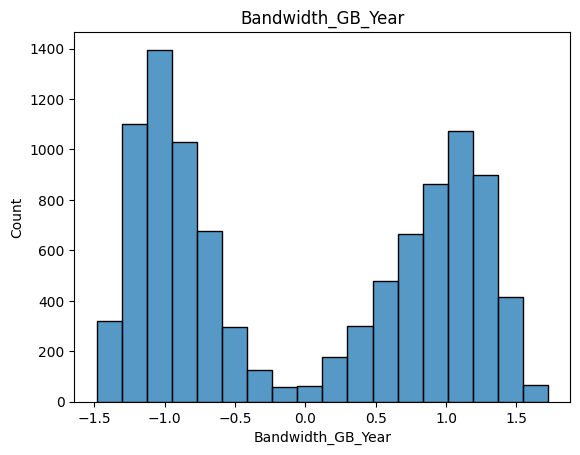

In [278]:
#Make a new dataframe to hold all of our z scores.
zscore_df = df.copy(deep=True)

#Get the z scores for values in numeric columns in zscore_df.
for col in zscore_df:
    if col in num_cols:
        zscore_df[col] = stats.zscore(df[col])

#Visualize the z scores of each of our numerical columns as a histogram. We could use our grid function,
#but it may be better to have a higher level of visual fidelity so we can see finer details in our outliers.

for col in num_cols:
    sns.histplot(data = zscore_df, x = col)
    plt.title(col)
    plt.show()

In [279]:
#Loop through our numeric columns and median-impute all outliers with a z-score above 3 or below -3

for col in num_cols:
    df.loc[np.logical_or(zscore_df[col]>3,  zscore_df[col]<-3), col] = df[col].median()

In [280]:
#Explore our columns and select the appropriate independent variables that we believe may exhibit a correlation with our dependent variable.
for col in df_cols:
    print(col)

CaseOrder
Customer_id
Interaction
UID
City
State
County
Zip
Lat
Lng
Population
Area
TimeZone
Job
Children
Age
Income
Marital
Gender
Churn
Outage_sec_perweek
Email
Contacts
Yearly_equip_failure
Techie
Contract
Port_modem
Tablet
InternetService
Phone
Multiple
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
PaymentMethod
Tenure
MonthlyCharge
Bandwidth_GB_Year
Item1
Item2
Item3
Item4
Item5
Item6
Item7
Item8


In [281]:
#Define our independent variables and dependent variable for initial regression.

MLR_X_cols = ['Lat', 'Lng', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'Bandwidth_GB_Year']
MLR_Y_col = 'MonthlyCharge'

LR_X_cols = ['Lat', 'Lng', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
LR_Y_col = 'Churn'

if MLR_or_LR == 'MLR':
    X_cols = MLR_X_cols
    Y_col = MLR_Y_col
elif MLR_or_LR == 'LR':
    X_cols = LR_X_cols
    Y_col = LR_Y_col

In [282]:
#Make a new dataframe out of X_cols and add Y_col to it.
#This will conclude our data cleaning.
XY_cols = []
XY_cols.extend(X_cols)
XY_cols.append(Y_col)
print(X_cols)
print(Y_col)
print(XY_cols)
XY_df = pd.DataFrame()
for col in XY_cols:
    XY_df[col] = df[col]
print(XY_df.info())

['Lat', 'Lng', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
Churn
['Lat', 'Lng', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'It

### C2: SUMMARY STATISTICS

We will be providing our summary statistics programmatically by building a loop that iterates through each of our selected variables and displays the summary statistics of each. For quantitative variables, we will manipulate the DataFrame.describe() method to customize our output, including the mean, median, mode, quartiles, minimum, maximum, and standard deviation of the feature. For categorical data, we will return the value counts and mode of the feature to satisfy this requirement, as many of these features cannot be computed for categorical features. We will then perform some string manipulation so that the output can be copied directly to a markdown cell and correctly display for readability. It is worth noting at this point that the Item1-Item8 survey response features will be treated as categorical features for this purpose (since they are qualitative by nature), and although they are not a part of our independent variables for this MLR, their unique treatment was included in this process to generalize it so that it could be applied to any combination of features in the dataset in future analyses.

Also important to note at this point is that this is not the final list of independent variables given to our initial MLR model. This is because the variables described in the current step have not been evaluated for multicollinearity, which will narrow the number of variables that we move forward with. This step will be described in more detail in section C4 of this analysis. Although it ultimately breaks the sequence of this presentation, we can reveal at this time that the final list of features that we will use for our initial modeling are as follows: 
'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', and 'Item3', are our independent variables, and 'Churn' is our dependent variable. The following features will be dropped in section C4 to treat for multicollinearity and will not be included in the dataset that we will export, but are included in our processing of this step for the purposes of continuity: 'Bandwidth_GB_Year', 'MonthlyCharge', 'Lat', 'Lng', 'Item1', 'Item2', 'Item6', 'Email', 'Item7', 'Item8', 'Item5', 'Outage_sec_perweek', and 'Item4'.

In [283]:
#get value counts of categorical and describe numeric variables
#We will treat the survey items as categorical variables and return value counts instead of numerical descriptive statistics.
#We are manipulating our strings programmatically so that they are readable using markdown formatting.
itemlist = ['Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']
cat_vars = []
quant_vars = []
for col in XY_cols:
    if XY_df[col].dtype in ['int64', 'float64'] and col not in itemlist:
        quant_vars.append(col)
        print('<br><br>')
        cat_type = str(XY_df[col].describe()).split("\n")[-1]
        print('<br>' + cat_type.split(', ')[0])
        print('<br>' + cat_type.split(', ')[1])
        print('<br>median: ' + str(XY_df[col].median()))
        print('<br>mode: ' + str(XY_df[col].mode().min()))
        for i in ['mean', 'std', 'min', '25%', '50%', '75%', 'max']:
            output = str(XY_df[col].describe().loc[[i]]).split("\n")[0]
            print('<br>' + output.split(' ')[0] + ': ' + output.split(' ')[-1])

    elif XY_df[col].dtype not in ['int64', 'float64'] or col in itemlist:
        cat_vars.append(col)
        print('<br><br>')
        cat_type = str(XY_df[col].value_counts()).split("\n")[-1]
        print('<br>' + cat_type.split(', ')[0])
        print('<br>mode: ' + str(XY_df[col].mode().min()))
        for i in range(len(df[col].unique())):
            output = str(XY_df[col].value_counts()).split("\n")[i]
            print('<br>' + output.split(' ')[0] + ': ' + output.split(' ')[-1])
            


 

<br><br>
<br>Name: Lat
<br>dtype: float64
<br>median: 39.3958
<br>mode: 39.3958
<br>mean: 38.73177
<br>std: 4.739582
<br>min: 24.58549
<br>25%: 35.486915
<br>50%: 39.3958
<br>75%: 42.018617
<br>max: 53.87601
<br><br>
<br>Name: Lng
<br>dtype: float64
<br>median: -87.917215
<br>mode: -87.9188
<br>mean: -90.086379
<br>std: 13.614594
<br>min: -135.33619
<br>25%: -96.75043
<br>50%: -87.917215
<br>75%: -80.088745
<br>max: -65.66785
<br><br>
<br>Name: Population
<br>dtype: float64
<br>median: 2909.75
<br>mode: 2910.5
<br>mean: 8382.29245
<br>std: 11655.318387
<br>min: 0.0
<br>25%: 738.0
<br>50%: 2909.75
<br>75%: 11365.75
<br>max: 52967.0
<br><br>
<br>Name: Area
<br>mode: Suburban
<br>Suburban: 3346
<br>Urban: 3327
<br>Rural: 3327
<br><br>
<br>Name: Children
<br>dtype: float64
<br>median: 1.0
<br>mode: 1
<br>mean: 1.925
<br>std: 1.883383
<br>min: 0.0
<br>25%: 0.0
<br>50%: 1.0
<br>75%: 3.0
<br>max: 8.0
<br><br>
<br>Name: Age
<br>dtype: float64
<br>median: 53.0
<br>mode: 32
<br>mean: 53.0784
<br

<br><br>
<br>Name: Lat
<br>dtype: float64
<br>median: 39.3958
<br>mode: 39.3958
<br>mean: 38.73177
<br>std: 4.739582
<br>min: 24.58549
<br>25%: 35.486915
<br>50%: 39.3958
<br>75%: 42.018617
<br>max: 53.87601
<br><br>
<br>Name: Lng
<br>dtype: float64
<br>median: -87.917215
<br>mode: -87.9188
<br>mean: -90.086379
<br>std: 13.614594
<br>min: -135.33619
<br>25%: -96.75043
<br>50%: -87.917215
<br>75%: -80.088745
<br>max: -65.66785
<br><br>
<br>Name: Population
<br>dtype: float64
<br>median: 2909.75
<br>mode: 2910.5
<br>mean: 8382.29245
<br>std: 11655.318387
<br>min: 0.0
<br>25%: 738.0
<br>50%: 2909.75
<br>75%: 11365.75
<br>max: 52967.0
<br><br>
<br>Name: Area
<br>mode: Suburban
<br>Suburban: 3346
<br>Urban: 3327
<br>Rural: 3327
<br><br>
<br>Name: Children
<br>dtype: float64
<br>median: 1.0
<br>mode: 1
<br>mean: 1.925
<br>std: 1.883383
<br>min: 0.0
<br>25%: 0.0
<br>50%: 1.0
<br>75%: 3.0
<br>max: 8.0
<br><br>
<br>Name: Age
<br>dtype: float64
<br>median: 53.0
<br>mode: 32
<br>mean: 53.0784
<br>std: 20.698882
<br>min: 18.0
<br>25%: 35.0
<br>50%: 53.0
<br>75%: 71.0
<br>max: 89.0
<br><br>
<br>Name: Income
<br>dtype: float64
<br>median: 33169.74249999999
<br>mode: 33170.604999999996
<br>mean: 38151.157582
<br>std: 24850.801431
<br>min: 348.67
<br>25%: 19224.7175
<br>50%: 33169.7425
<br>75%: 51669.6375
<br>max: 124025.1
<br><br>
<br>Name: Marital
<br>mode: Divorced
<br>Divorced: 2092
<br>Widowed: 2027
<br>Separated: 2014
<br>Never: 1956
<br>Married: 1911
<br><br>
<br>Name: Gender
<br>mode: Female
<br>Female: 5025
<br>Male: 4744
<br>Nonbinary: 231
<br><br>
<br>Name: Outage_sec_perweek
<br>dtype: float64
<br>median: 10.01856
<br>mode: 10.01856
<br>mean: 9.999842
<br>std: 2.933317
<br>min: 1.144796
<br>25%: 8.033911
<br>50%: 10.01856
<br>75%: 11.95548
<br>max: 18.85173
<br><br>
<br>Name: Email
<br>dtype: float64
<br>median: 12.0
<br>mode: 12
<br>mean: 12.0222
<br>std: 3.004565
<br>min: 3.0
<br>25%: 10.0
<br>50%: 12.0
<br>75%: 14.0
<br>max: 21.0
<br><br>
<br>Name: Contacts
<br>dtype: float64
<br>median: 1.0
<br>mode: 1
<br>mean: 0.9408
<br>std: 0.891614
<br>min: 0.0
<br>25%: 0.0
<br>50%: 1.0
<br>75%: 1.0
<br>max: 3.0
<br><br>
<br>Name: Yearly_equip_failure
<br>dtype: float64
<br>median: 0.0
<br>mode: 0
<br>mean: 0.3688
<br>std: 0.578464
<br>min: 0.0
<br>25%: 0.0
<br>50%: 0.0
<br>75%: 1.0
<br>max: 2.0
<br><br>
<br>Name: Techie
<br>mode: No
<br>No: 8321
<br>Yes: 1679
<br><br>
<br>Name: Contract
<br>mode: Month-to-month
<br>Month-to-month: 5456
<br>Two: 2442
<br>One: 2102
<br><br>
<br>Name: Port_modem
<br>mode: No
<br>No: 5166
<br>Yes: 4834
<br><br>
<br>Name: Tablet
<br>mode: No
<br>No: 7009
<br>Yes: 2991
<br><br>
<br>Name: InternetService
<br>mode: Fiber Optic
<br>Fiber: 4408
<br>DSL: 3463
<br>None: 2129
<br><br>
<br>Name: Phone
<br>mode: Yes
<br>Yes: 9067
<br>No: 933
<br><br>
<br>Name: Multiple
<br>mode: No
<br>No: 5392
<br>Yes: 4608
<br><br>
<br>Name: OnlineSecurity
<br>mode: No
<br>No: 6424
<br>Yes: 3576
<br><br>
<br>Name: OnlineBackup
<br>mode: No
<br>No: 5494
<br>Yes: 4506
<br><br>
<br>Name: DeviceProtection
<br>mode: No
<br>No: 5614
<br>Yes: 4386
<br><br>
<br>Name: TechSupport
<br>mode: No
<br>No: 6250
<br>Yes: 3750
<br><br>
<br>Name: StreamingTV
<br>mode: No
<br>No: 5071
<br>Yes: 4929
<br><br>
<br>Name: StreamingMovies
<br>mode: No
<br>No: 5110
<br>Yes: 4890
<br><br>
<br>Name: PaperlessBilling
<br>mode: Yes
<br>Yes: 5882
<br>No: 4118
<br><br>
<br>Name: PaymentMethod
<br>mode: Electronic Check
<br>Electronic: 3398
<br>Mailed: 2290
<br>Bank: 2229
<br>Credit: 2083
<br><br>
<br>Name: Tenure
<br>dtype: float64
<br>median: 35.430506995
<br>mode: 55.44991
<br>mean: 34.526188
<br>std: 26.443063
<br>min: 1.000259
<br>25%: 7.917694
<br>50%: 35.430507
<br>75%: 61.479795
<br>max: 71.99928
<br><br>
<br>Name: MonthlyCharge
<br>dtype: float64
<br>median: 167.4847
<br>mode: 179.9476
<br>mean: 172.624816
<br>std: 42.943094
<br>min: 79.97886
<br>25%: 139.979239
<br>50%: 167.4847
<br>75%: 200.734725
<br>max: 290.160419
<br><br>
<br>Name: Bandwidth_GB_Year
<br>dtype: float64
<br>median: 3279.536903
<br>mode: 155.5067148
<br>mean: 3392.34155
<br>std: 2185.294852
<br>min: 155.506715
<br>25%: 1236.470827
<br>50%: 3279.536903
<br>75%: 5586.14137
<br>max: 7158.98153
<br><br>
<br>Name: Item1
<br>mode: 3
<br>3: 3448
<br>4: 3358
<br>2: 1393
<br>5: 1359
<br>1: 224
<br>6: 199
<br>7: 19
<br><br>
<br>Name: Item2
<br>mode: 3
<br>3: 3415
<br>4: 3412
<br>5: 1368
<br>2: 1360
<br>1: 217
<br>6: 215
<br>7: 13
<br><br>
<br>Name: Item3
<br>mode: 3
<br>3: 3435
<br>4: 3410
<br>2: 1424
<br>5: 1313
<br>6: 203
<br>1: 202
<br>7: 12
<br>8: 1
<br><br>
<br>Name: Item4
<br>mode: 4
<br>4: 3452
<br>3: 3430
<br>2: 1350
<br>5: 1335
<br>1: 221
<br>6: 203
<br>7: 9
<br><br>
<br>Name: Item5
<br>mode: 3
<br>3: 3462
<br>4: 3417
<br>2: 1378
<br>5: 1321
<br>1: 206
<br>6: 204
<br>7: 12
<br><br>
<br>Name: Item6
<br>mode: 3
<br>3: 3445
<br>4: 3333
<br>2: 1427
<br>5: 1382
<br>6: 210
<br>1: 190
<br>7: 12
<br>8: 1
<br><br>
<br>Name: Item7
<br>mode: 4
<br>4: 3456
<br>3: 3446
<br>5: 1335
<br>2: 1309
<br>6: 224
<br>1: 219
<br>7: 11
<br><br>
<br>Name: Item8
<br>mode: 3
<br>3: 3461
<br>4: 3400
<br>2: 1378
<br>5: 1335
<br>1: 206
<br>6: 205
<br>7: 14
<br>8: 1
<br><br>
<br>Name: Churn
<br>mode: No
<br>No: 7350
<br>Yes: 2650


### C3: VISUALIZATIONS

Now that our data is prepared, we can move onto our graphical data analysis of our independent variables and dependent variables. To do this, we will first generate visualizations of the univariate statistics of every independent variables as well as our independent variable. If the given variable is numeric, we will generate a box plot. If the variable is categorical, we will display a bar chart. Then, we will generate bivariate statistical visualizations for each pairing of our independent variables and dependent variable to explore any apparent relationship between them. Since we are performing logistic regression, we know that our dependent variable is categorical, and this informs what kinds of visualizations are appropriate based on whether the independent variable being evaluated. If the given independent variable is numeric, we will generate a kernel density plot. If the variable is categorical, we will display stacked bar charts of the value counts and normalized ratios of all combinations of values between the features. These operations will be performed programmatically, and are chosen based on the data types of the evaluated variables.

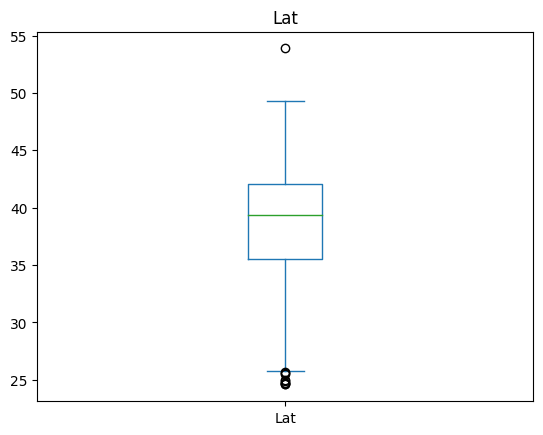

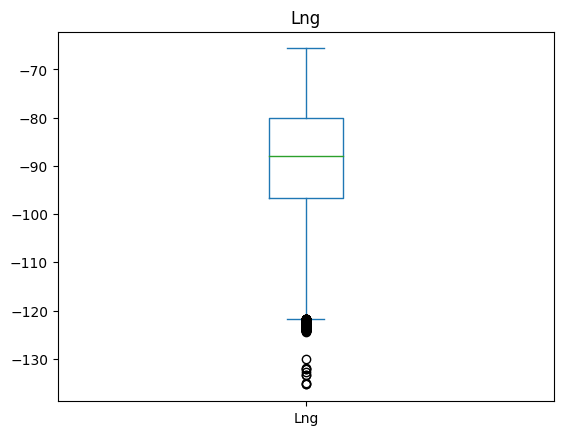

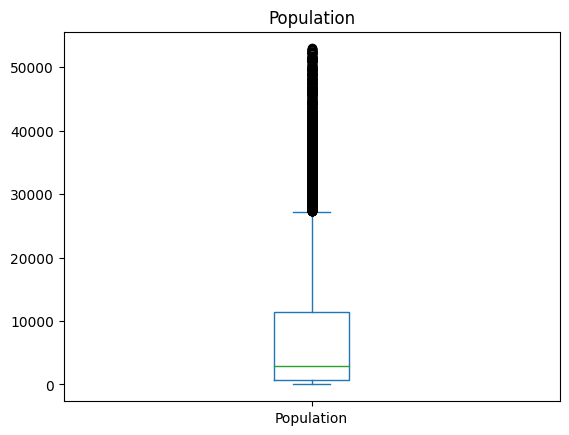

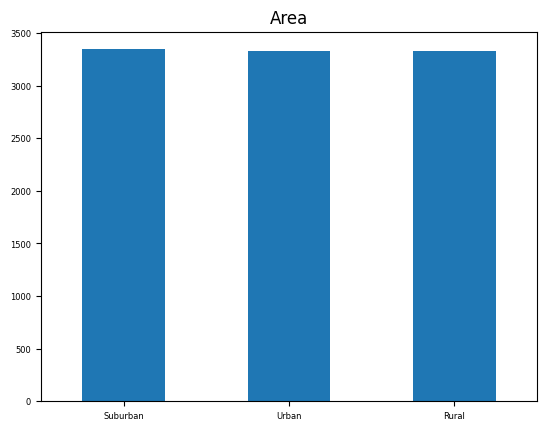

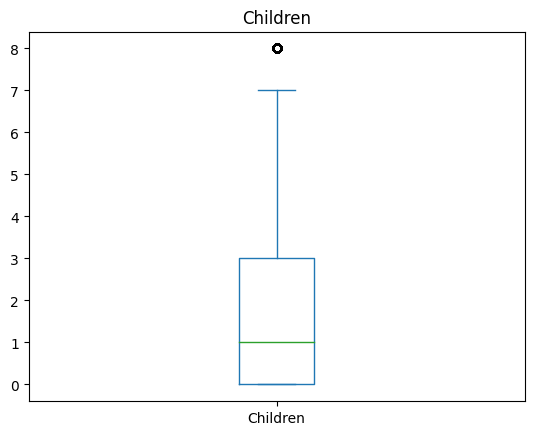

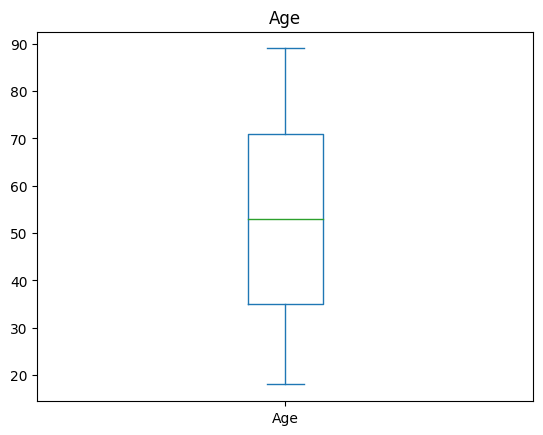

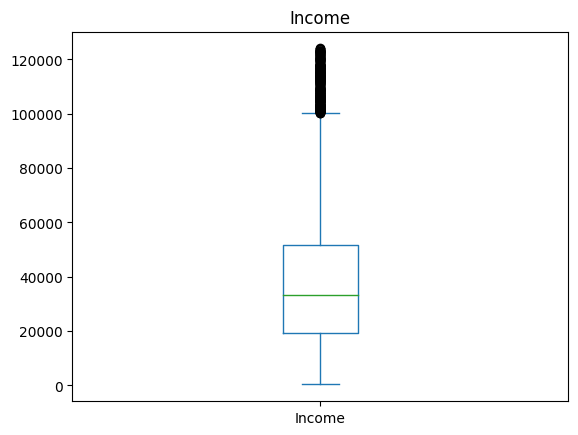

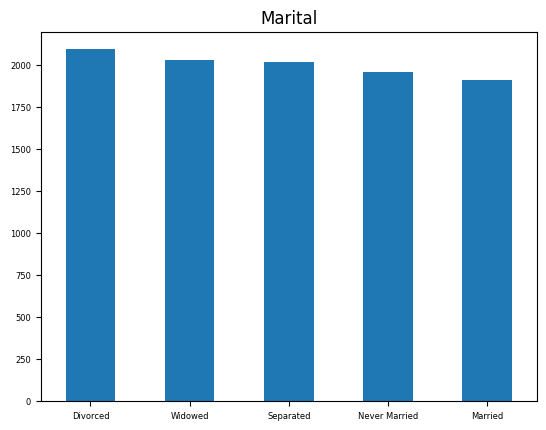

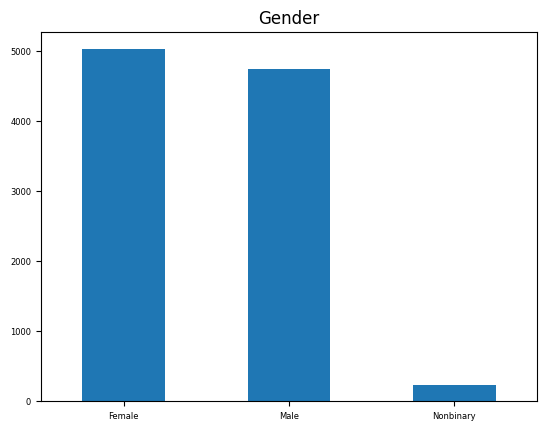

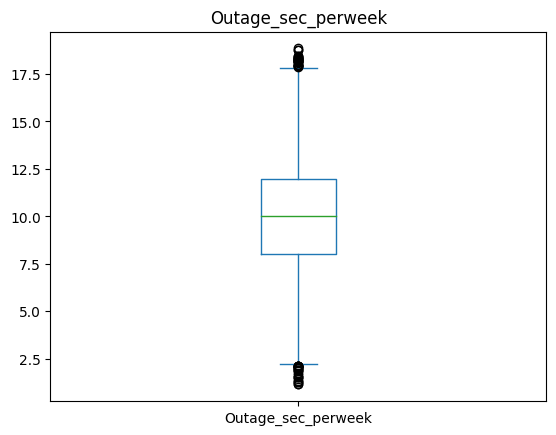

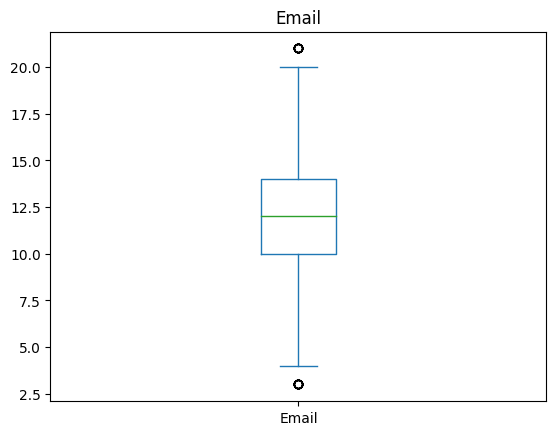

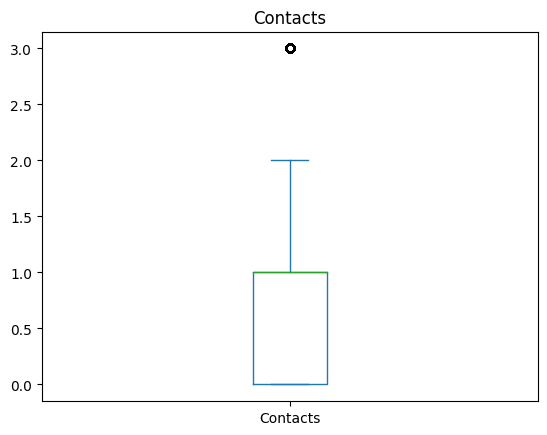

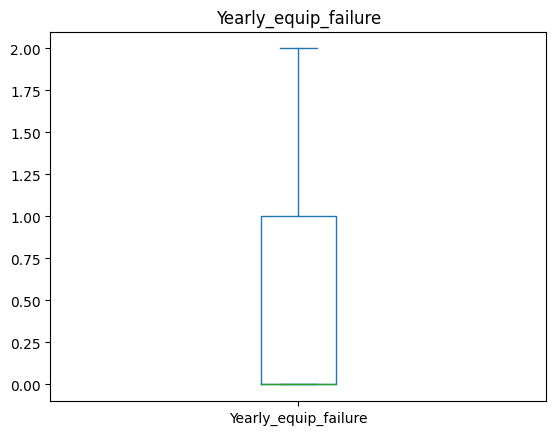

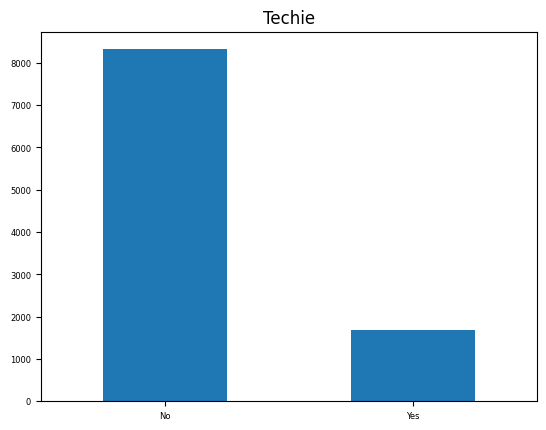

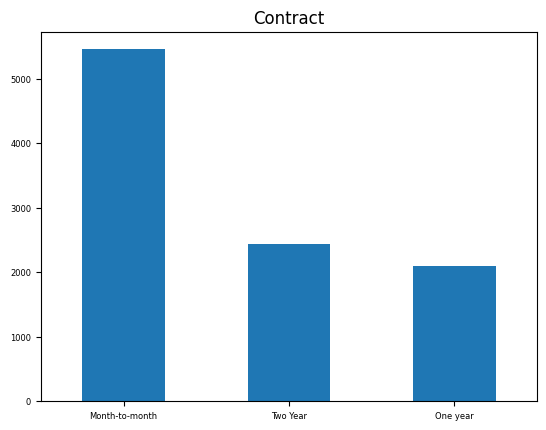

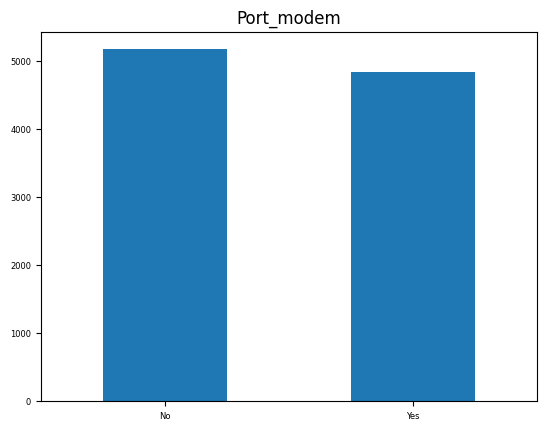

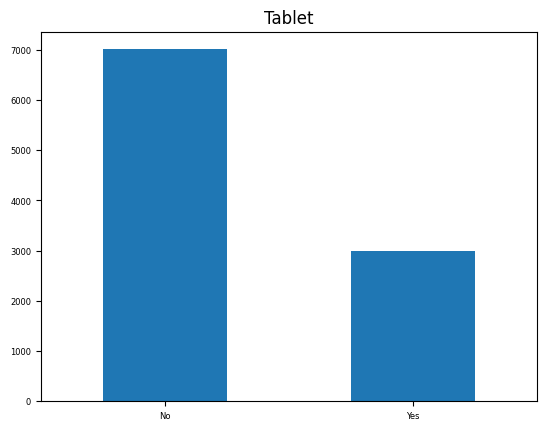

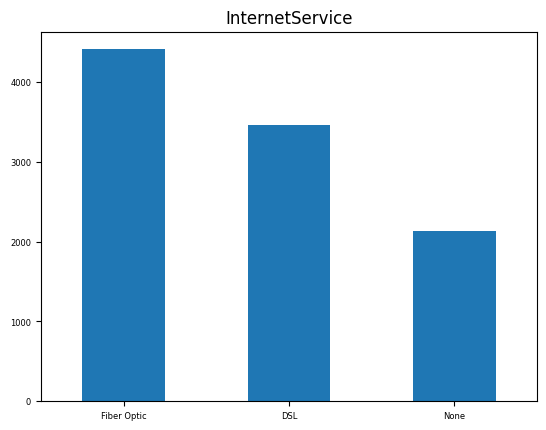

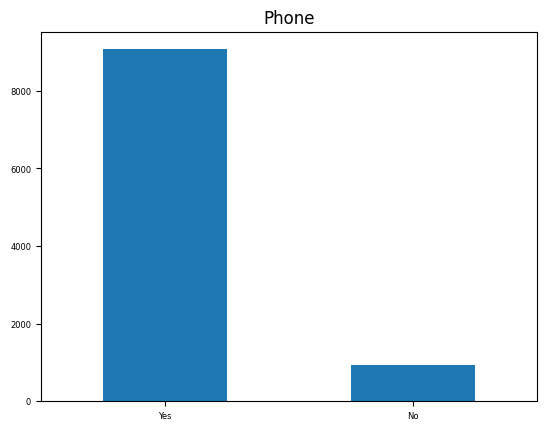

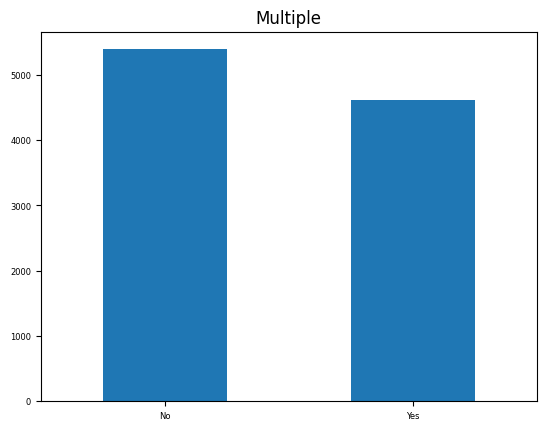

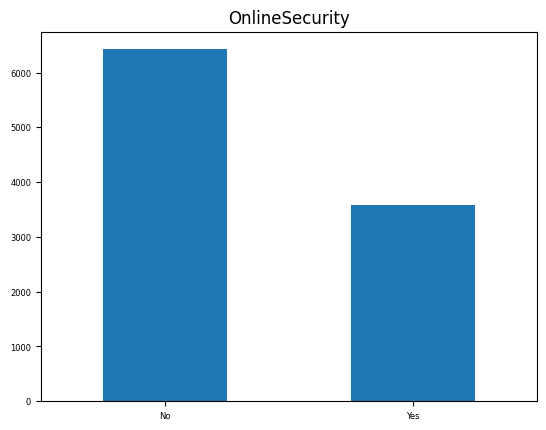

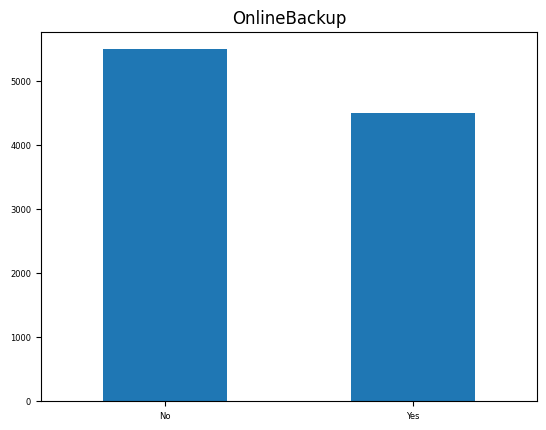

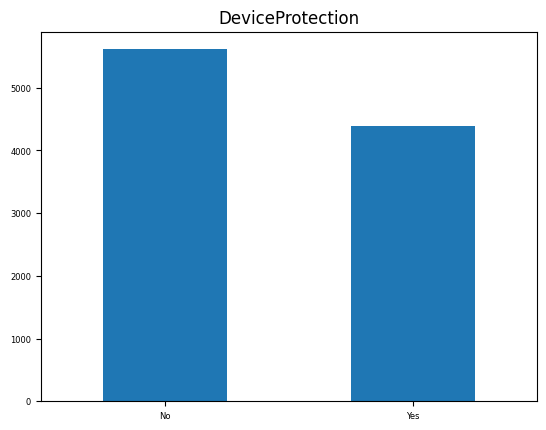

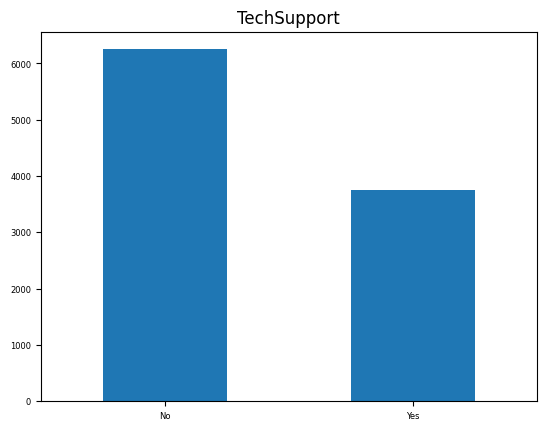

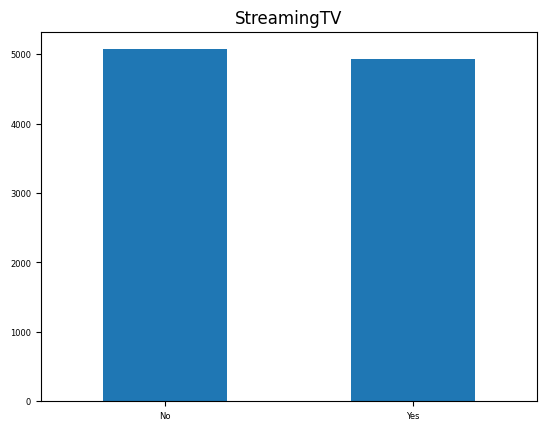

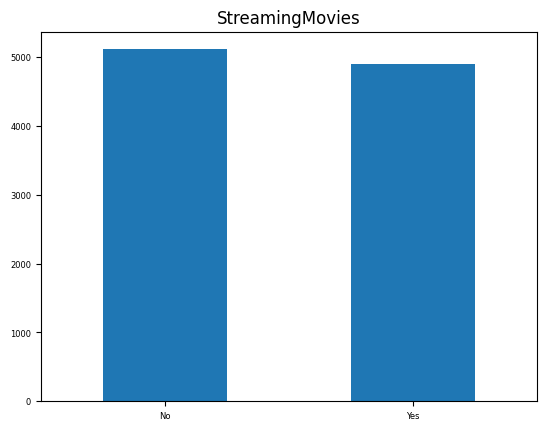

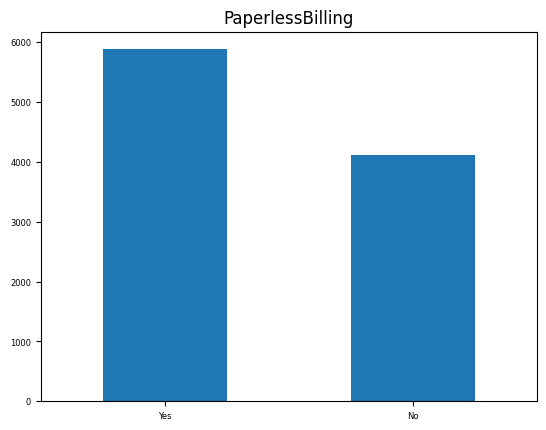

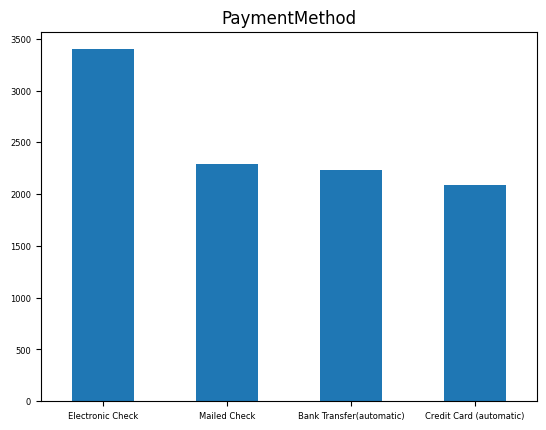

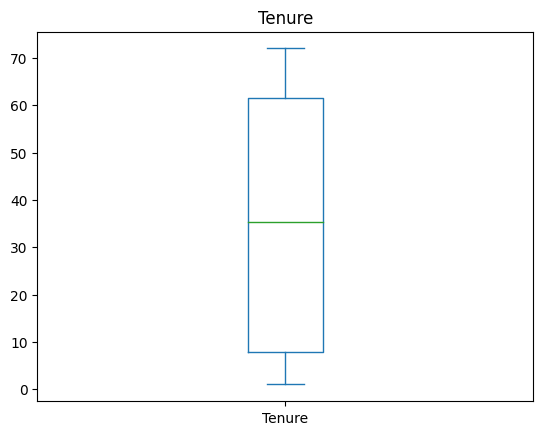

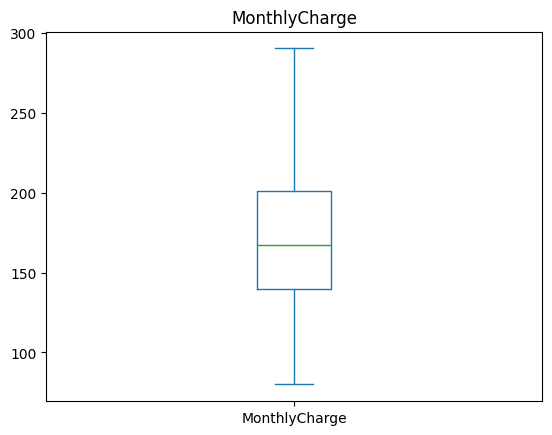

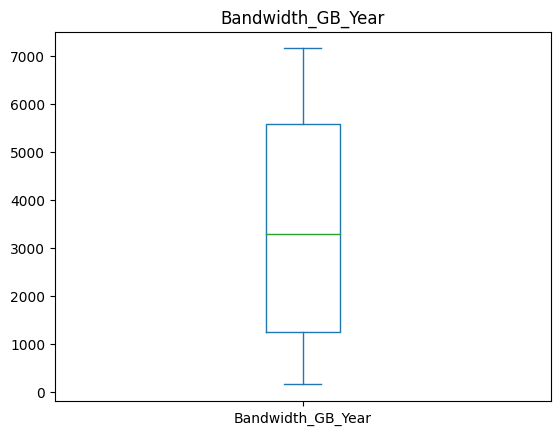

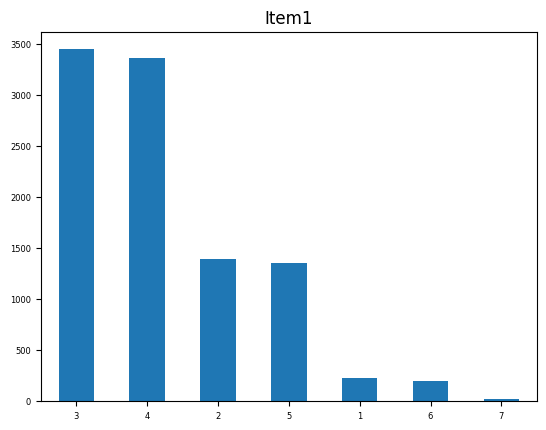

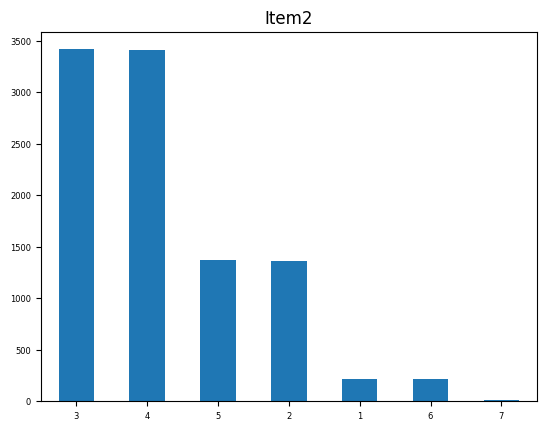

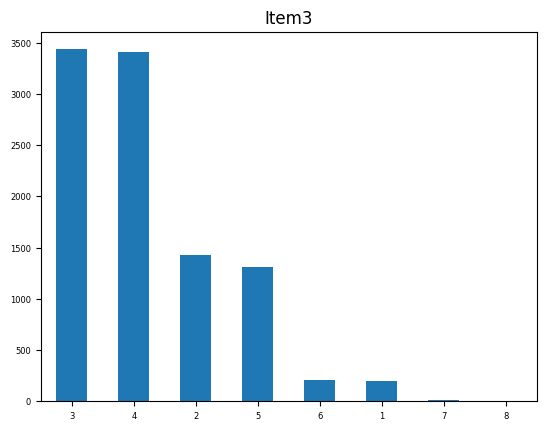

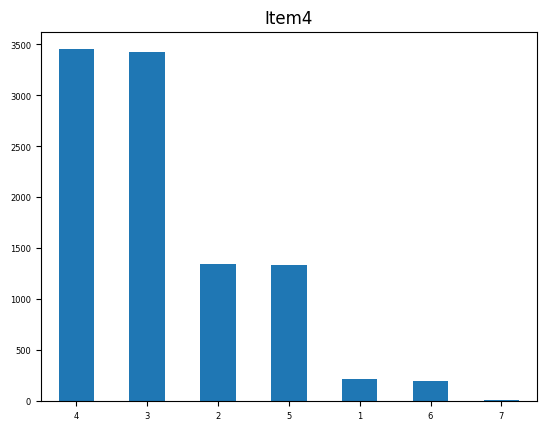

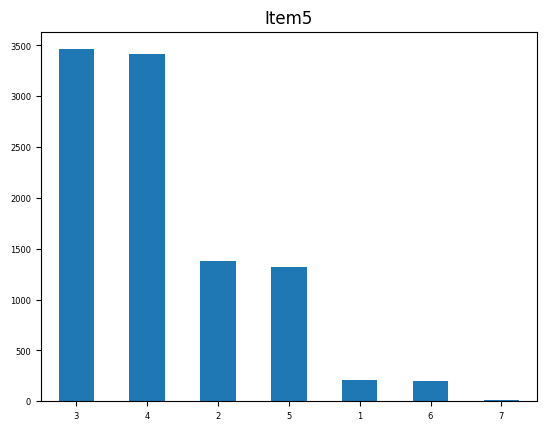

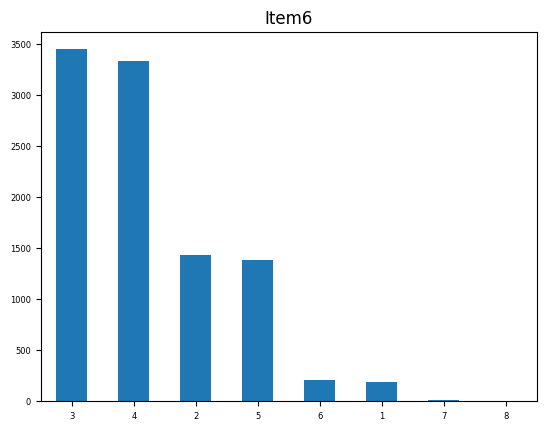

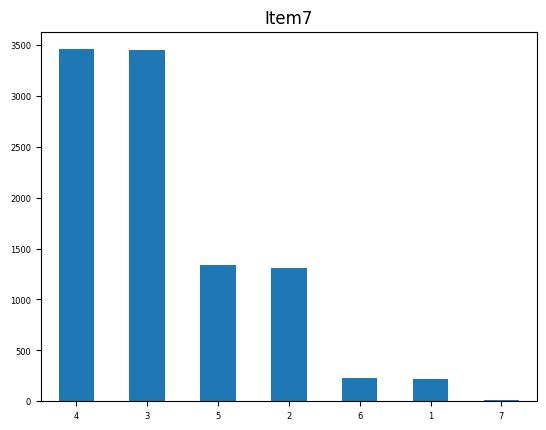

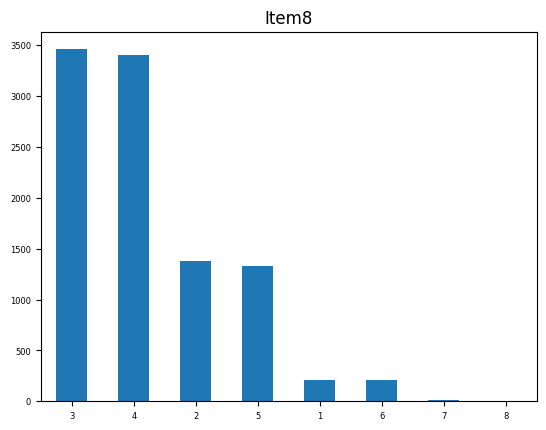

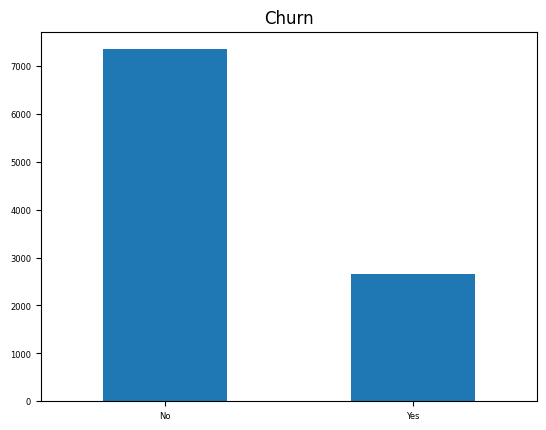

In [284]:
#Univariate statistical visualizations
for col in XY_cols:
    if col in quant_vars:
        XY_df[col].plot(kind='box', rot=0, title=col)
        plt.show()
    elif col in cat_vars:
        XY_df[col].value_counts().plot(kind='bar', rot=0, title=col, fontsize=6)
        plt.show()

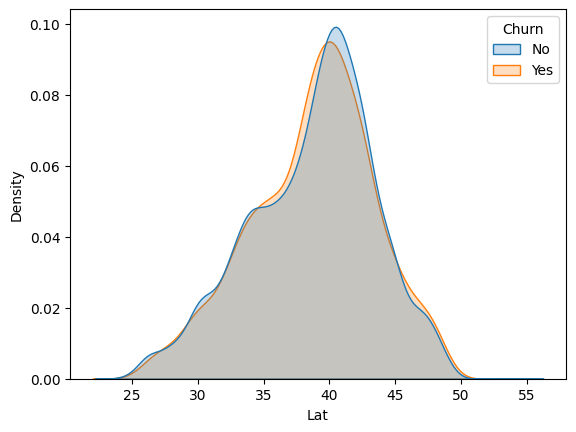

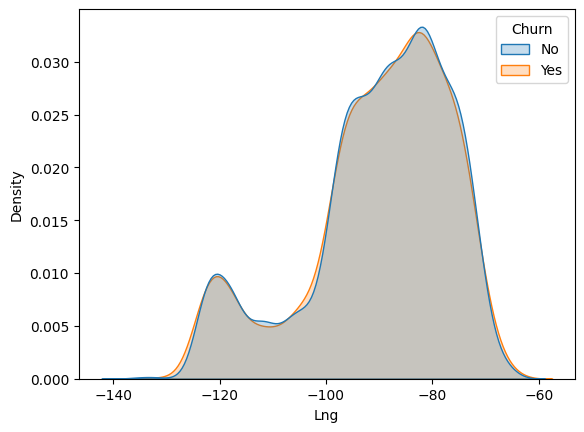

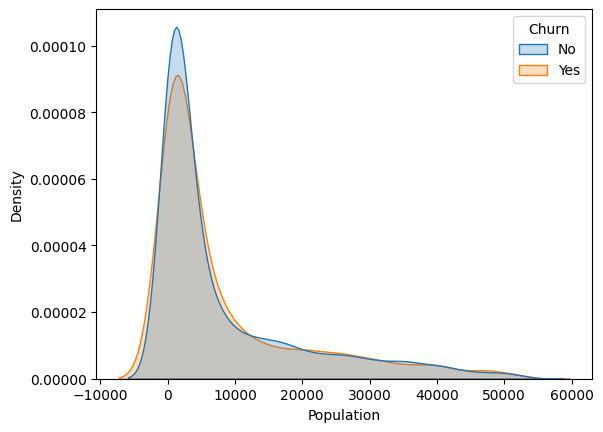

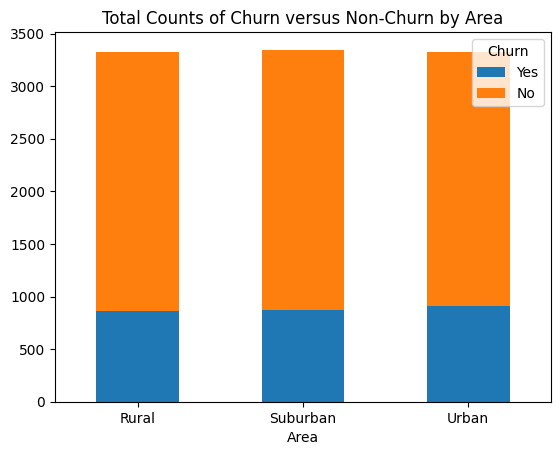

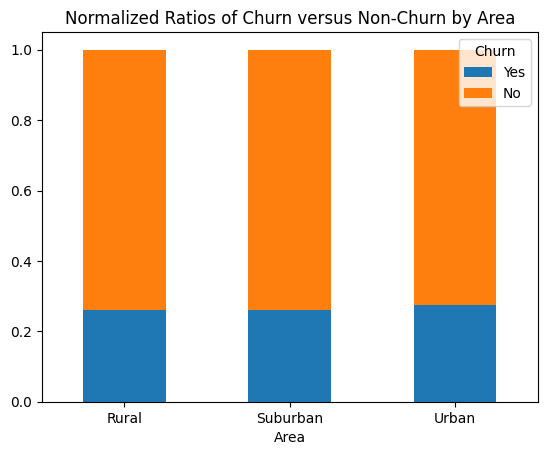

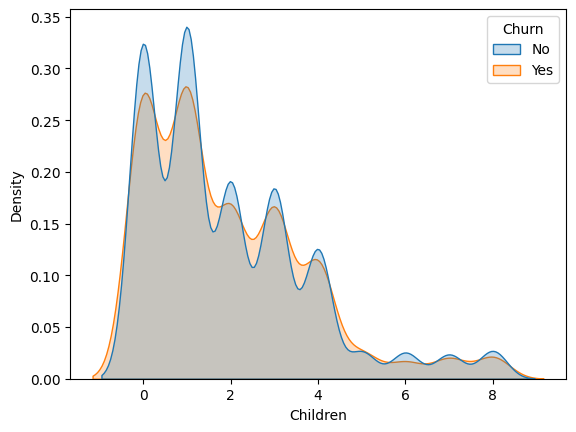

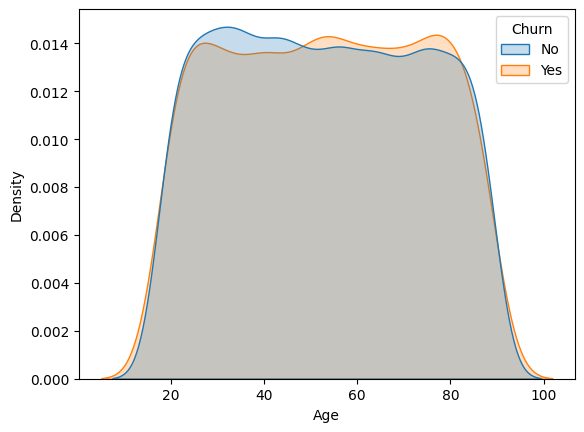

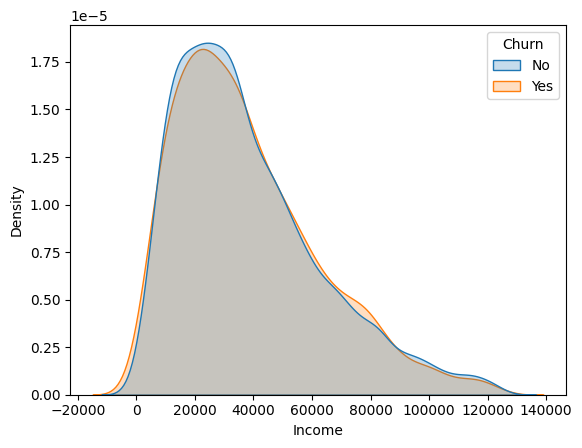

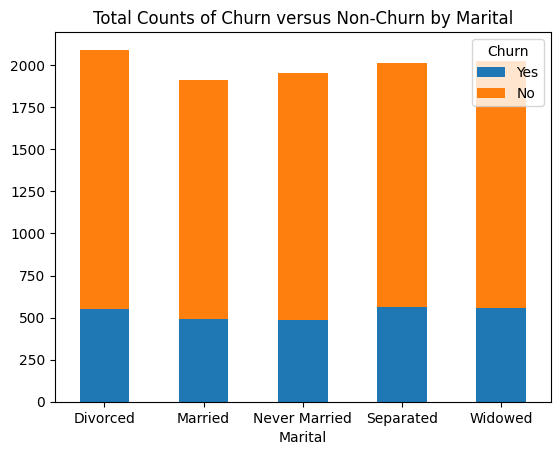

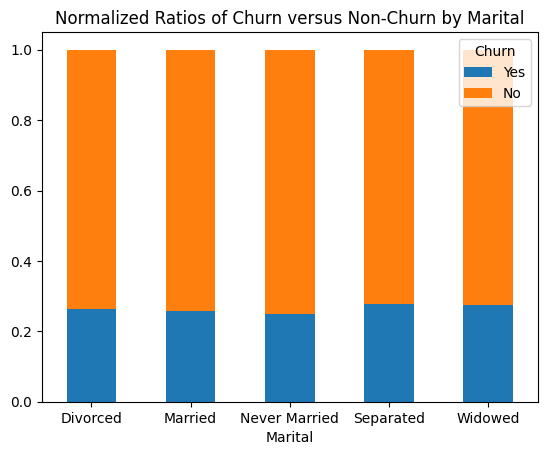

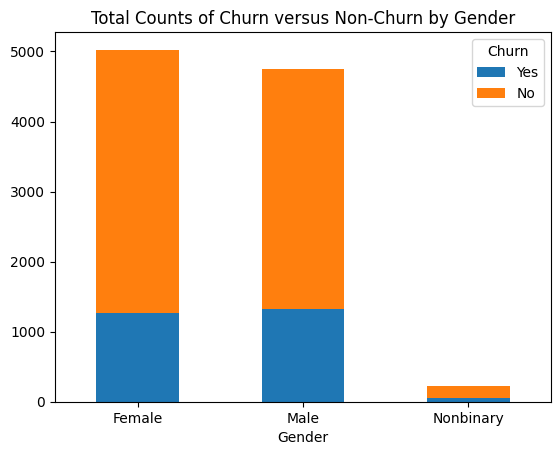

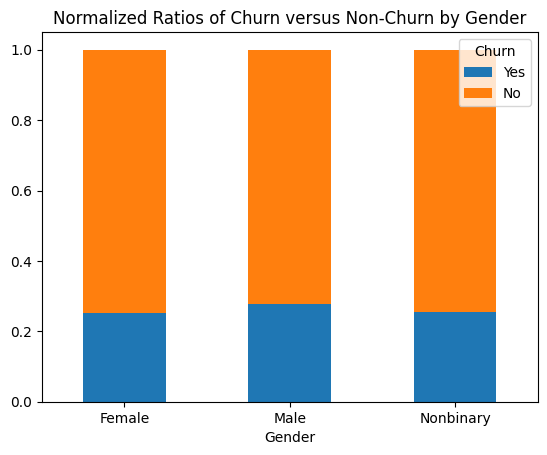

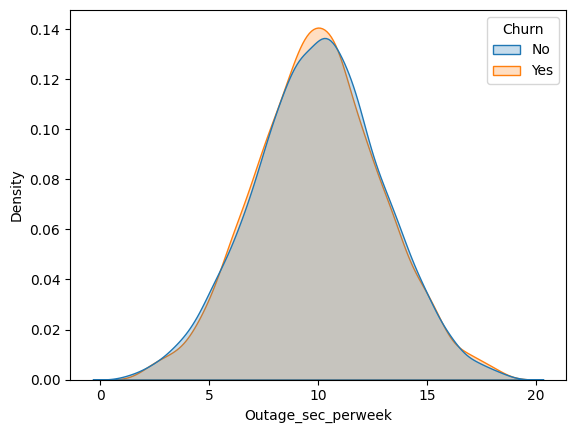

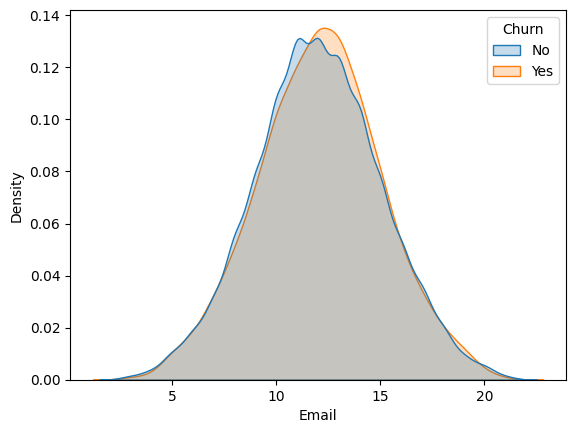

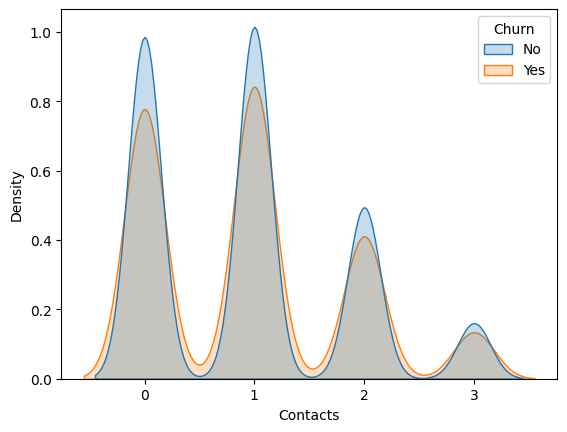

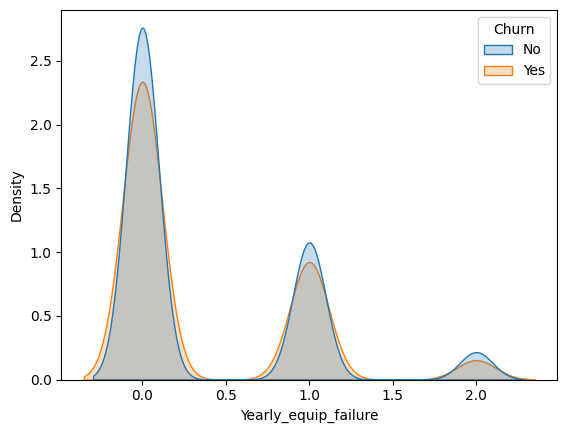

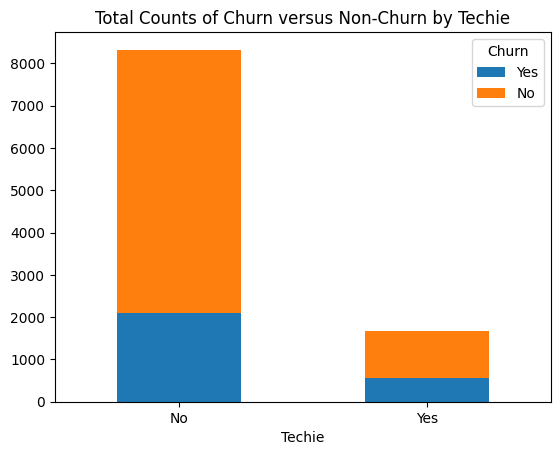

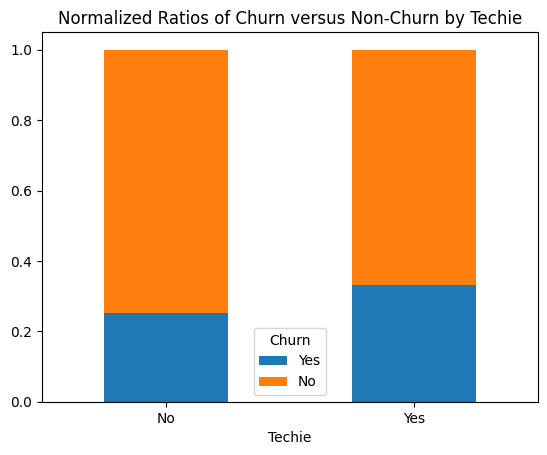

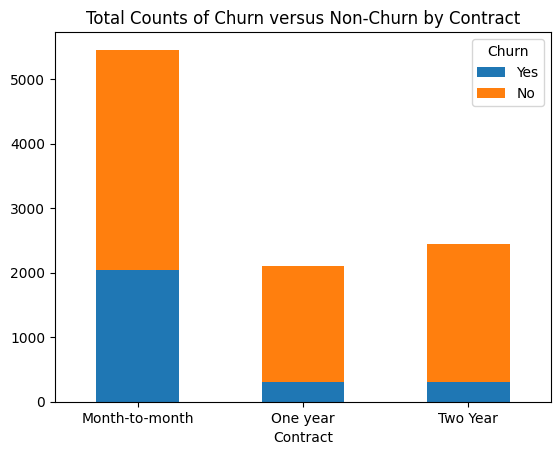

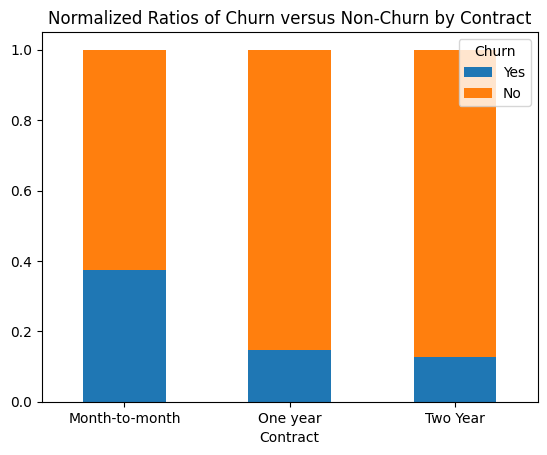

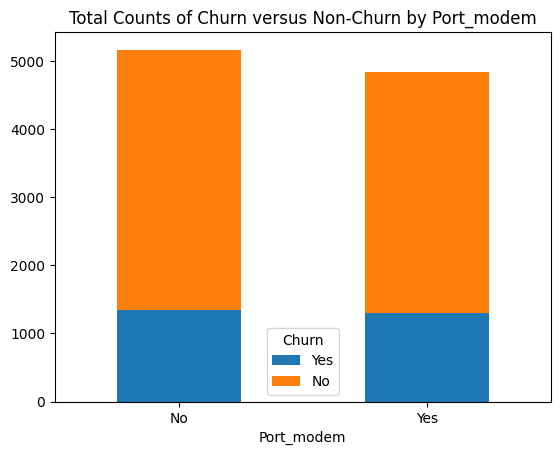

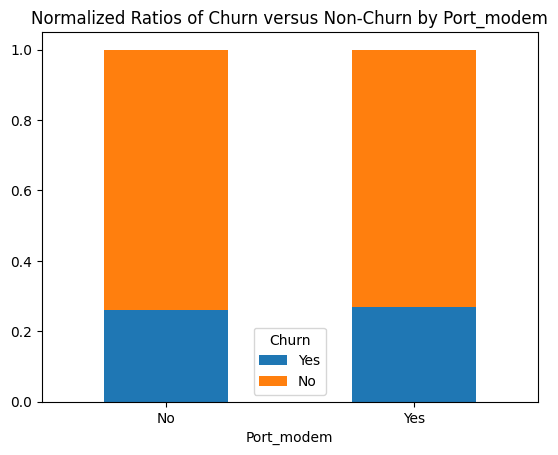

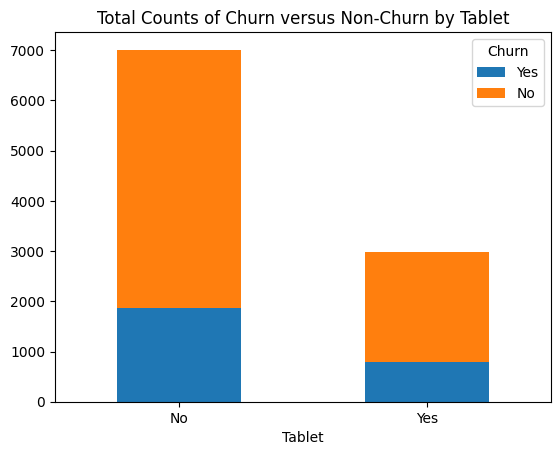

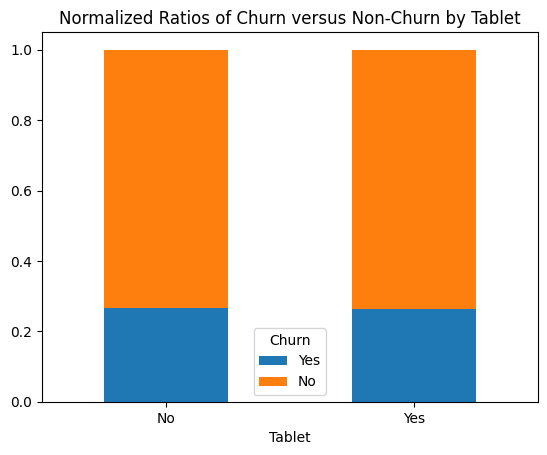

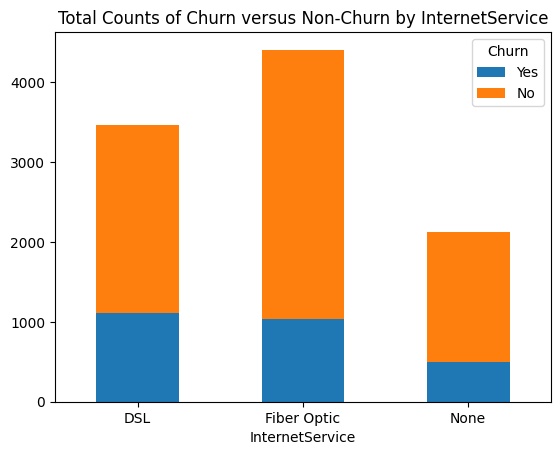

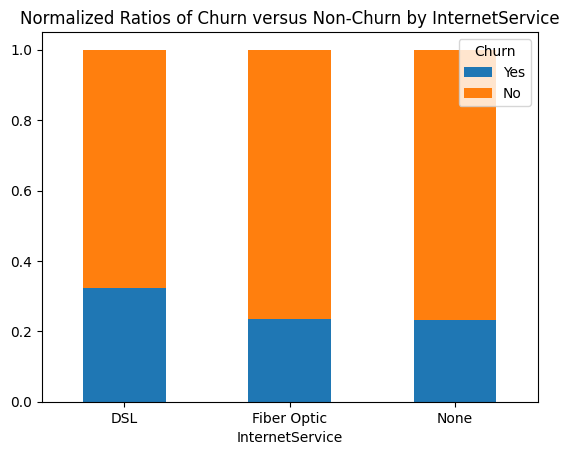

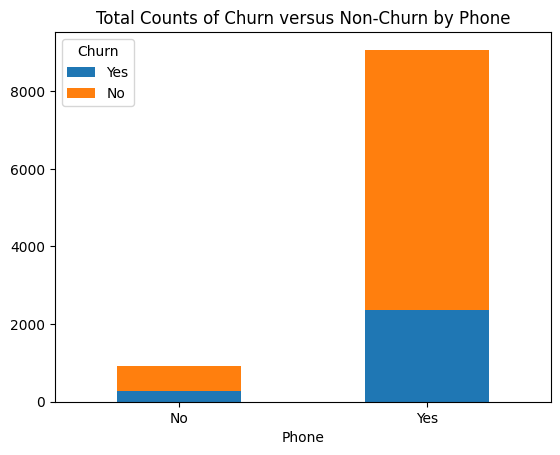

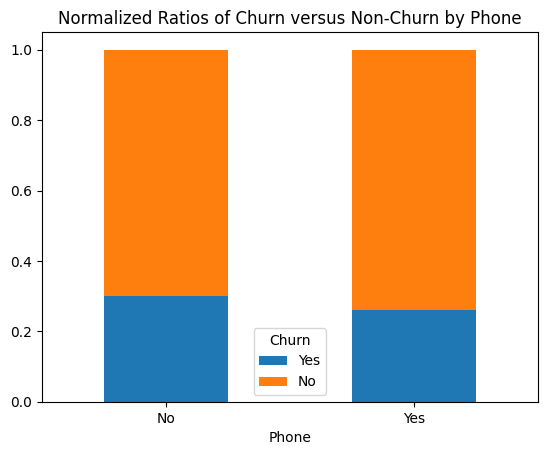

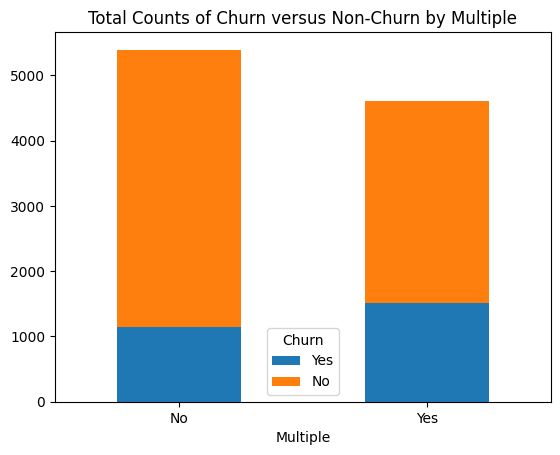

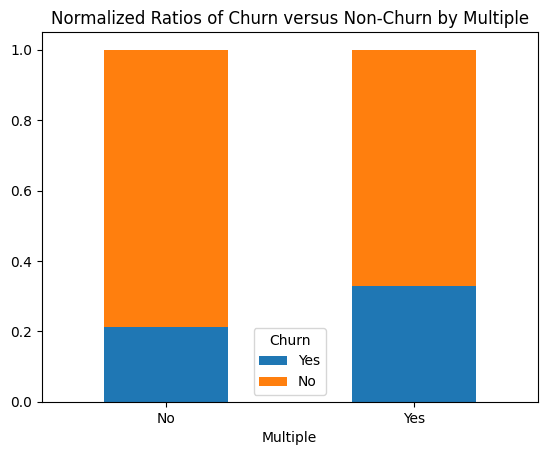

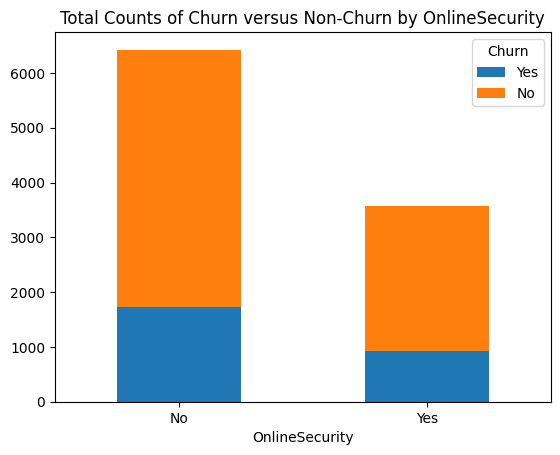

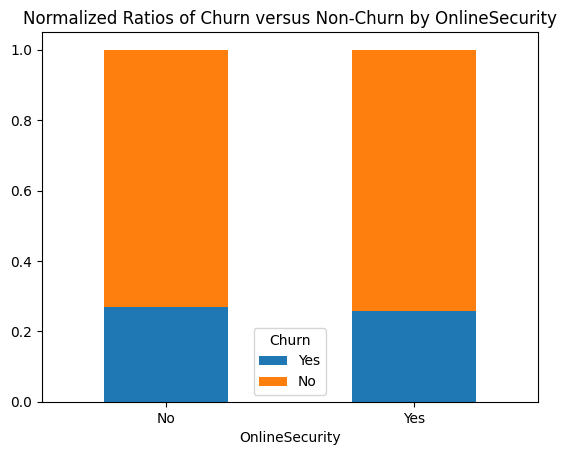

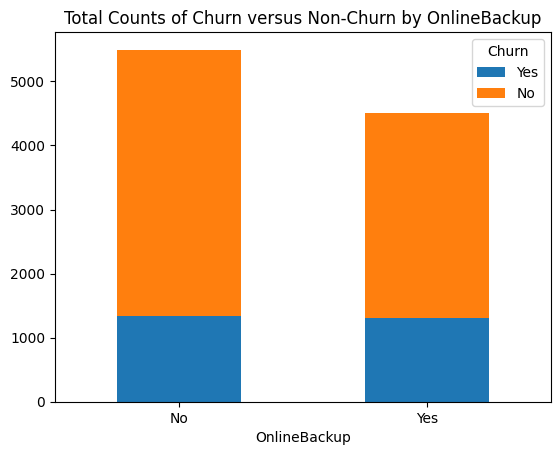

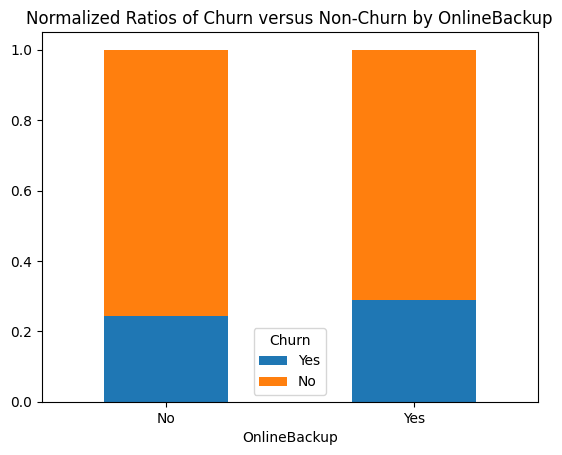

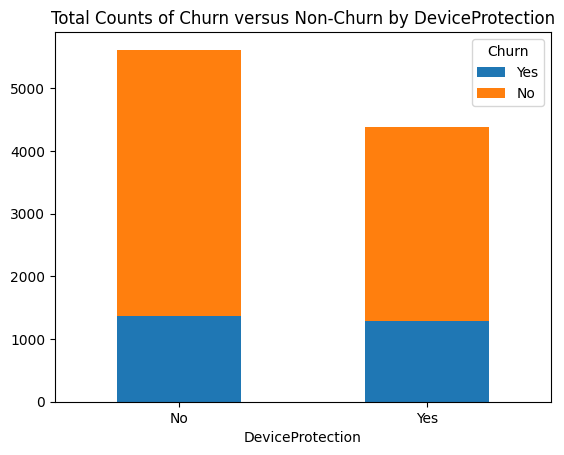

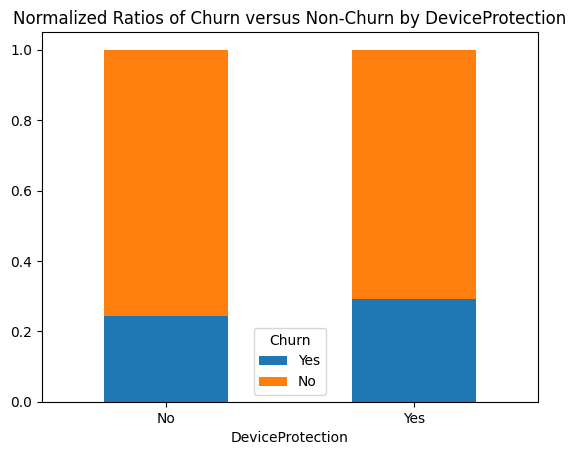

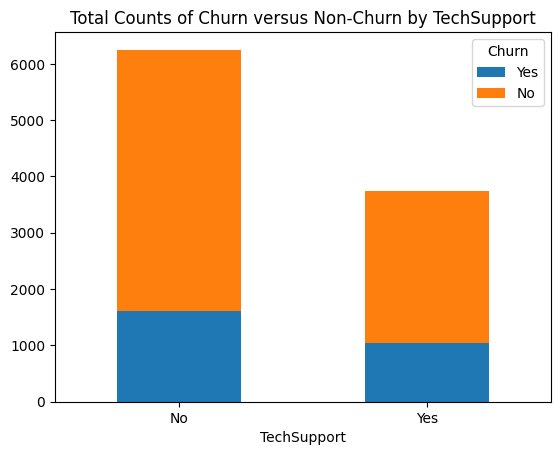

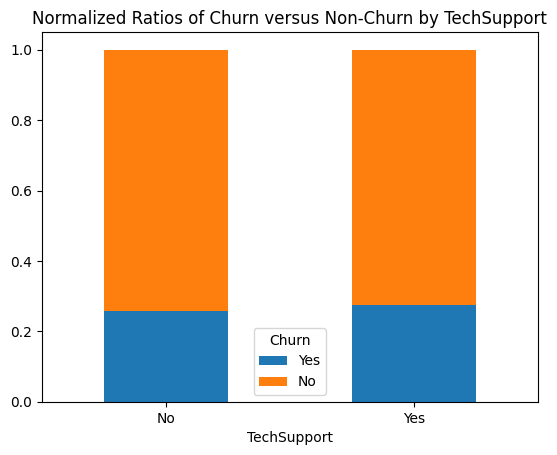

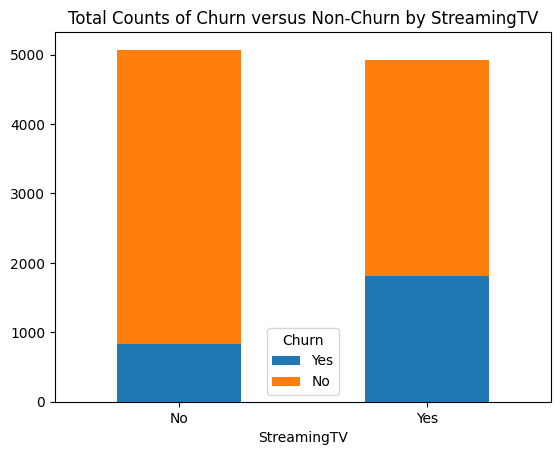

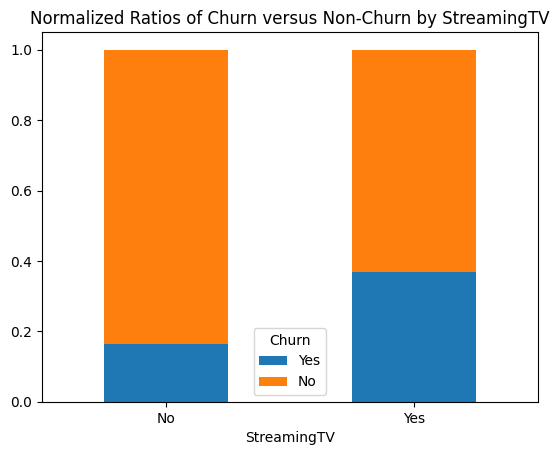

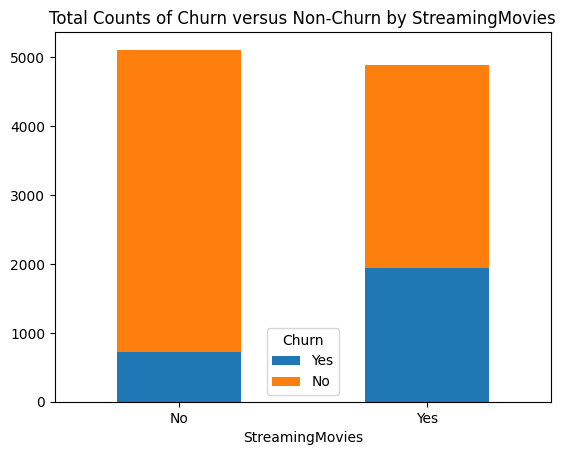

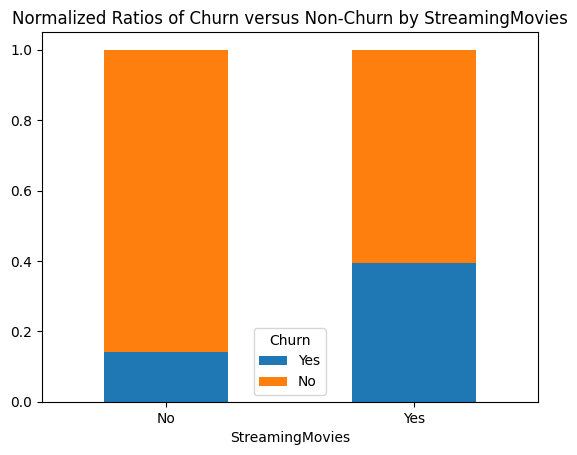

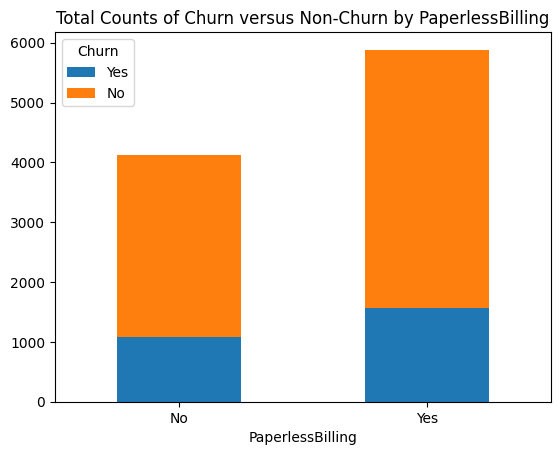

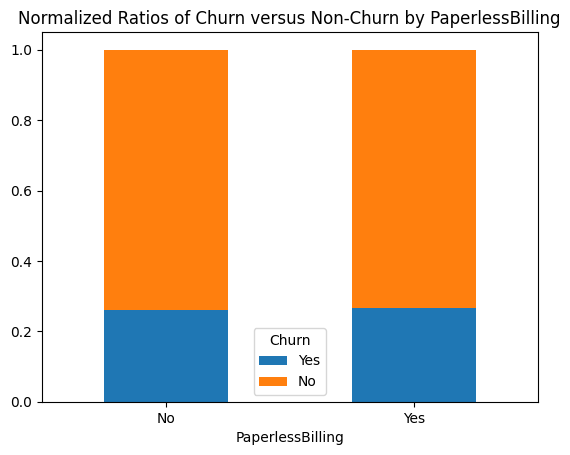

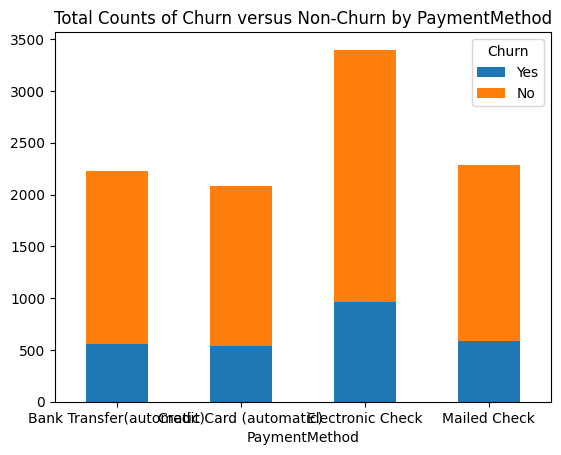

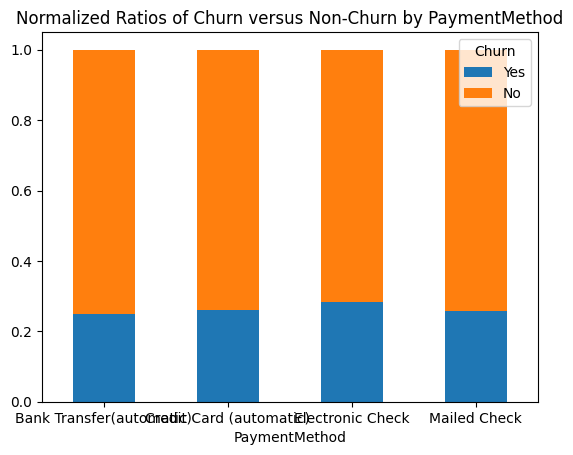

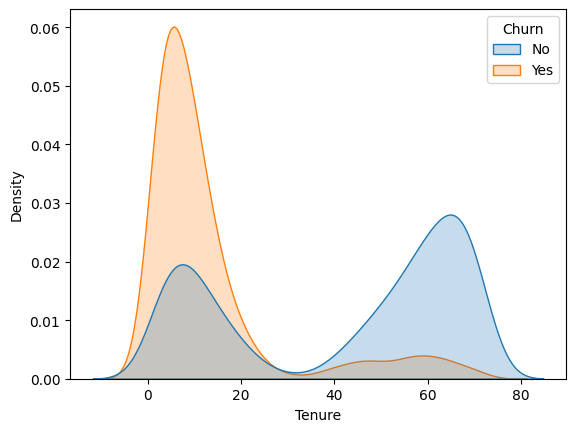

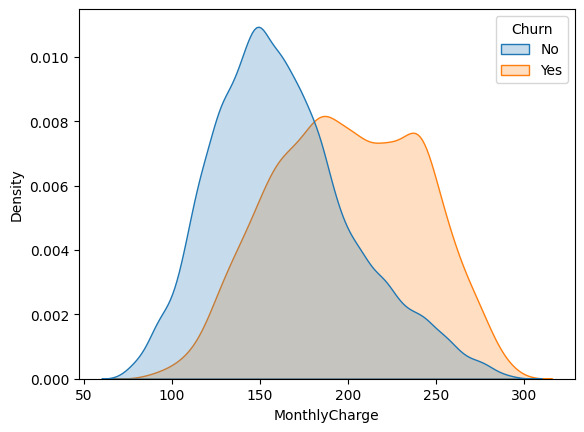

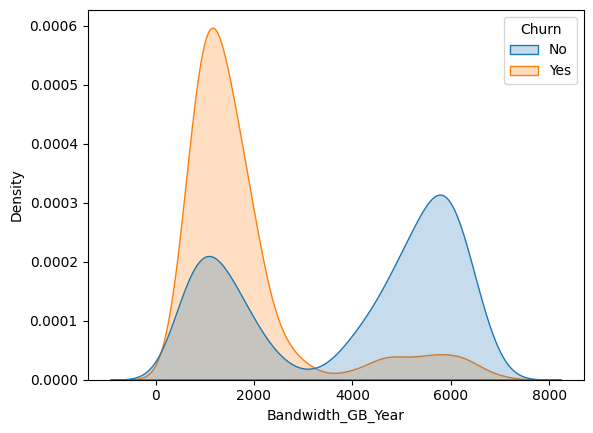

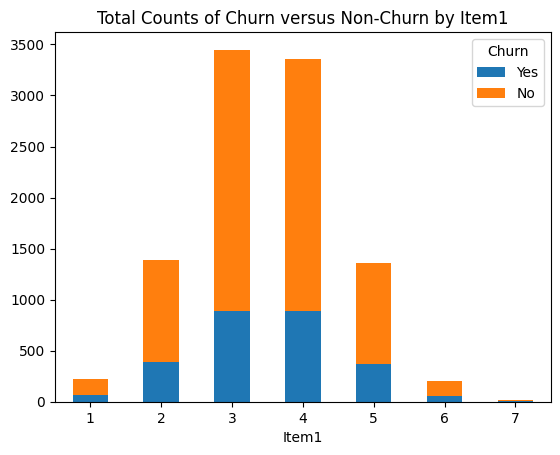

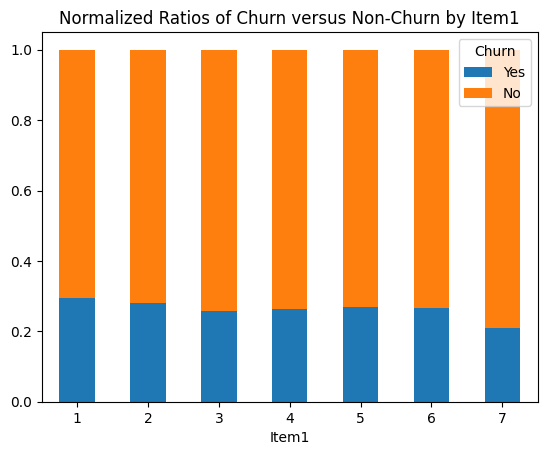

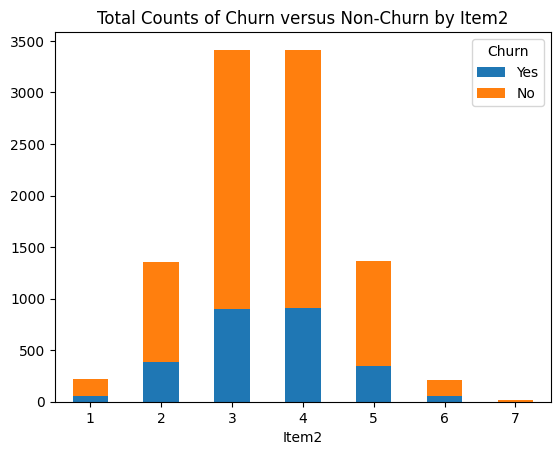

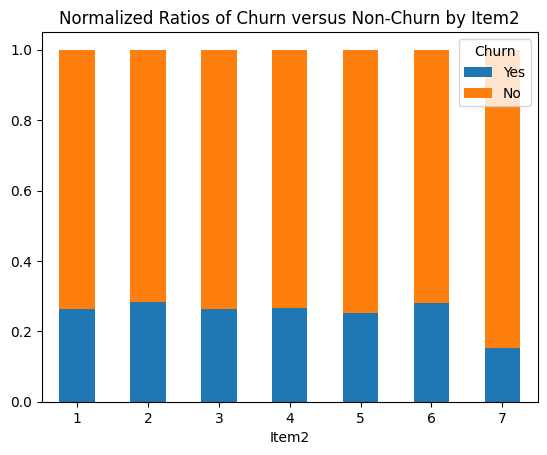

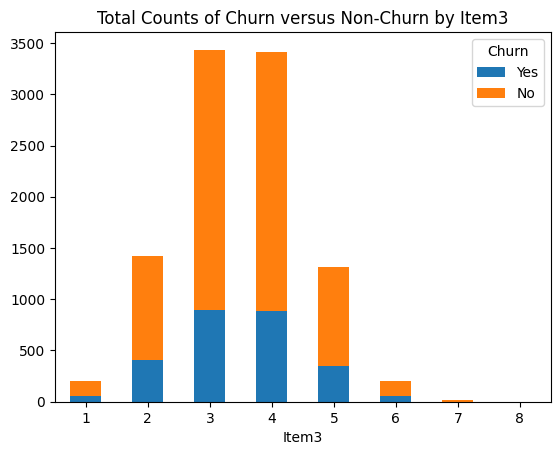

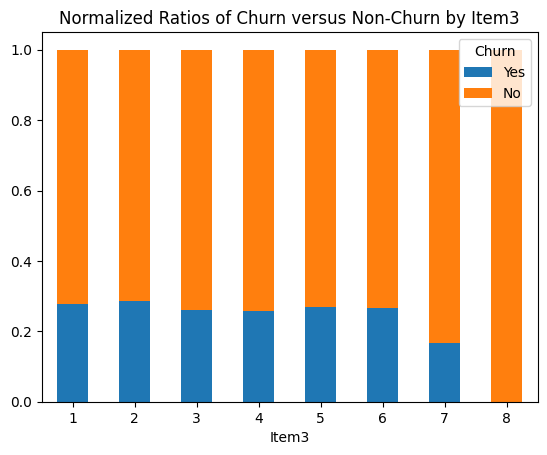

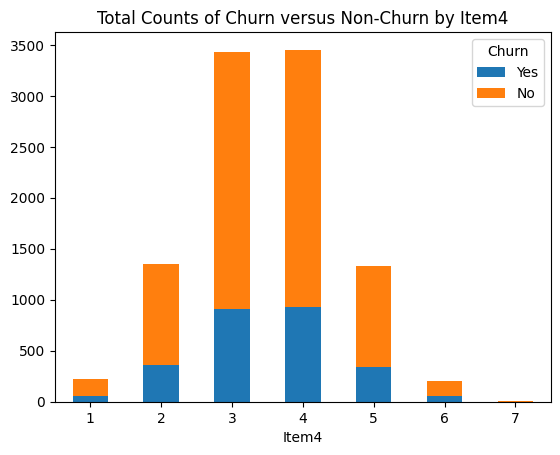

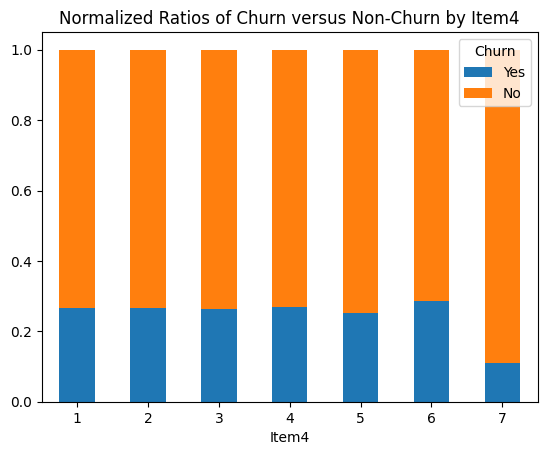

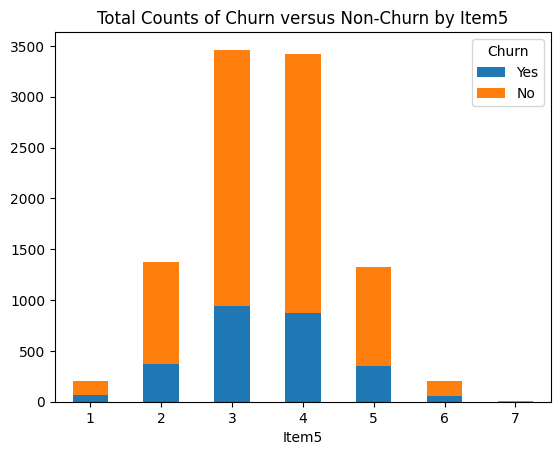

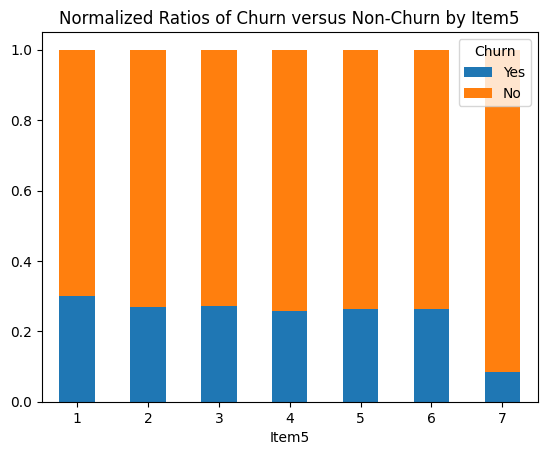

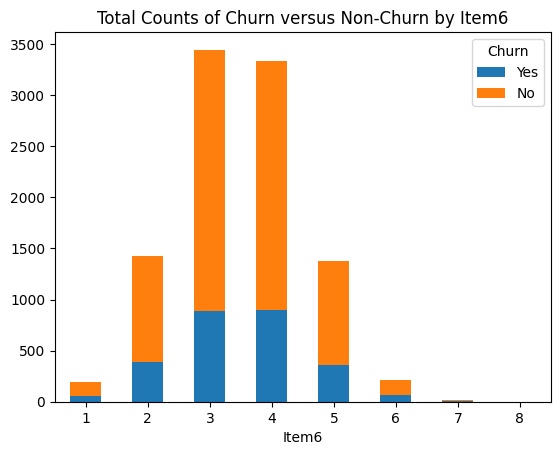

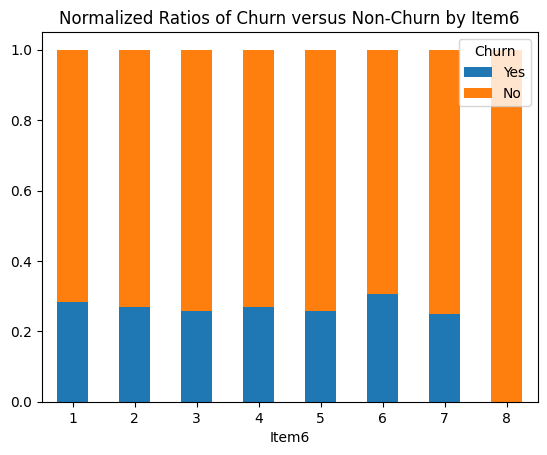

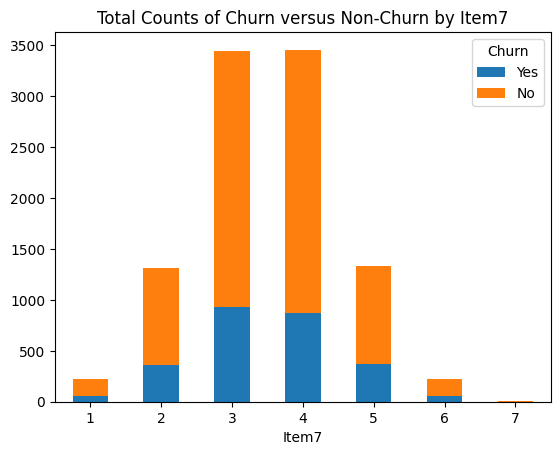

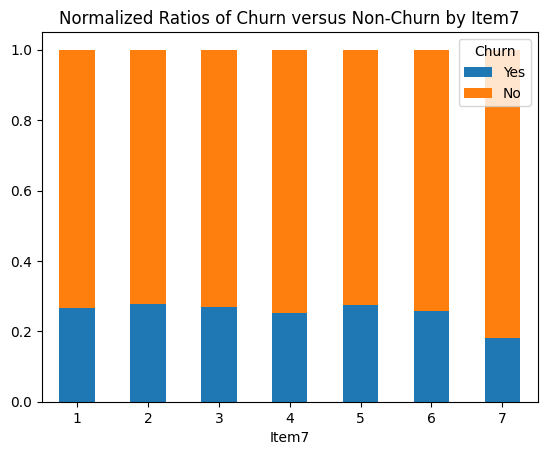

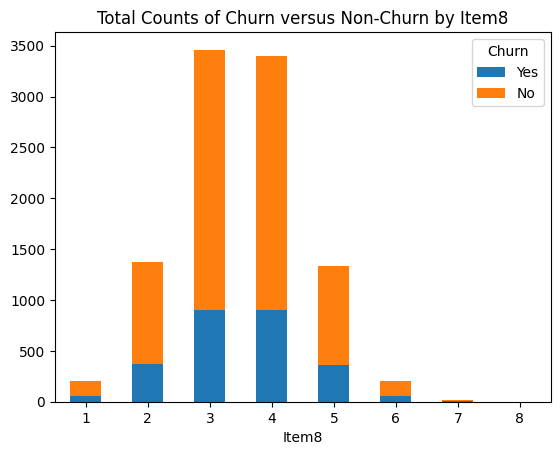

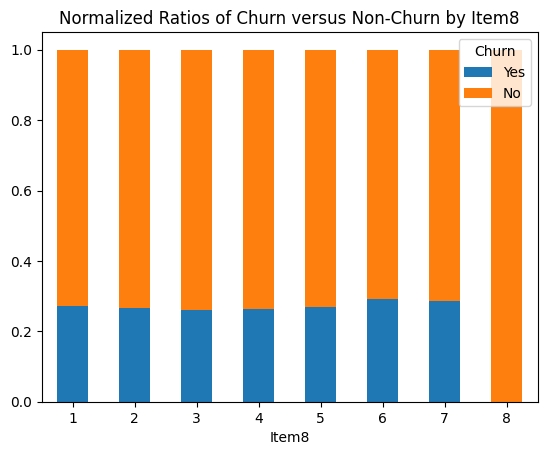

In [285]:
#Bivariate statistical visualizations
#Contextually generate the appropriate visualizations depending on the data types of our dependent and independent variables.
for col in X_cols:
    if col in quant_vars:
        if Y_col in quant_vars:
            XY_df[[col, Y_col]].plot(kind='scatter', x=col, y=Y_col, alpha=.1)
            plt.show()
        elif Y_col in cat_vars:
            sns.kdeplot(data=XY_df, x=col, hue=Y_col, fill=True, common_norm=False)
            plt.show()
    elif col in cat_vars:
        if Y_col in quant_vars:
            sns.kdeplot(data=XY_df, x=Y_col, hue=col, fill=True, common_norm=False)
            plt.show()
        elif Y_col in cat_vars:
            crosstab_01 = pd.crosstab(XY_df[col], XY_df[Y_col]).sort_index(axis=1, ascending=False)
            crosstab_01.plot(kind='bar', stacked = True, rot=0, title="Total Counts of " + Y_col + " versus Non-" + Y_col + " by " + col)
            crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
            plt.show()
            crosstab_norm.plot(kind='bar', stacked = True, rot=0, title="Normalized Ratios of " + Y_col + " versus Non-" + Y_col + " by " + col)
            plt.show()

#Code paraphrased from: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### C4: DATA TRANSFORMATION

Before we can begin performing our regressions, we must first transform several features of our data so that they can conform to the assumptions of logistic regression and produce a valid analysis. The first goal of this process is to re-express our categorical variables as numeric so that they can be processed mathematically. One obstacle on the path to this goal is that some of the categorical features that we have chosen are not able to be logically ordered, meaning that we will need to perform ordinal encoding on some of our categorical variables, and nominally encode others using one-hot encoding. In addition, several of our variables will need to be manually encoded ordinally, as the default method of ordinal encoding chosen will attempt to order them alphabetically. This will correctly encode many of our ordinal variables, including all "Yes/No" features, but we will still need to perform some manual encoding on several features.

After our categorical features are encoded, we will treat our independent variables for multicollinearity, paring them down until the only independent variables remaining do not have significant relationships with one another. To do this, we will first iteratively evaluate the Variance Inflation Factor (VIF) of our independent variables, drop the variable with the highest VIF, and then re-evaluate the remaining features in the same fashion until no features remain with a VIF greater than 10. At this point, we can perform an initial logistic regression before moving on to feature selection. This will also return our final list of independent variables described in C2 of this analysis.

In [286]:
#Generate our lists of categorical features to be encoded using each method.
nom_enc_cols= ['PaymentMethod','Gender','Marital', 'InternetService']
ord_enc_cols= []

for col in XY_cols:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        if col not in nom_enc_cols:
            ord_enc_cols.append(col)

print(nom_enc_cols)
print(ord_enc_cols)

['PaymentMethod', 'Gender', 'Marital', 'InternetService']
['Area', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


In [287]:
#We are nearly ready to start encoding.
#Make a blank disctionary to be used in the encoding and imputation process.
nom_enc_dict = {}
#Create a blank dataframe specifically for the nominal encoding process
nom_df = pd.DataFrame()

In [288]:
for col_name in nom_enc_cols:
    nom_enc_dict[col_name] = OneHotEncoder()
    col = XY_df[col_name]
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    nom_vals = nom_enc_dict[col_name].fit_transform(reshaped_vals)
    nom_df_loop = pd.DataFrame(nom_vals.toarray(), columns=nom_enc_dict[col_name].get_feature_names_out())
    nom_df_loop.index = col_not_null.index
    nom_df = nom_df.join(nom_df_loop, how='outer')

print(nom_df.columns.tolist())

['x0_Bank Transfer(automatic)', 'x0_Credit Card (automatic)', 'x0_Electronic Check', 'x0_Mailed Check', 'x0_Female', 'x0_Male', 'x0_Nonbinary', 'x0_Divorced', 'x0_Married', 'x0_Never Married', 'x0_Separated', 'x0_Widowed', 'x0_DSL', 'x0_Fiber Optic', 'x0_None']


In [289]:
#Search all column names in nom_df and if they start with 'x0_', remove 'x0_' from the string. 
for col in nom_df.columns:
    if col.startswith('x0_'):
        new_col_name = col.replace('x0_', '')
        nom_df.rename(columns={col: new_col_name}, inplace=True)
        
print(nom_df.columns.tolist())

['Bank Transfer(automatic)', 'Credit Card (automatic)', 'Electronic Check', 'Mailed Check', 'Female', 'Male', 'Nonbinary', 'Divorced', 'Married', 'Never Married', 'Separated', 'Widowed', 'DSL', 'Fiber Optic', 'None']


In [290]:
#Now we should drop one of our dummy columns 
# for each of our original columns to abide by the K-1 rule.
#The column picked for each can be arbitrary, because they are not ordered by nature.
nom_df.drop(columns = ['Mailed Check', 'Male', 'Never Married', 'None'], inplace=True)

In [291]:
#As before, we will make a blank dictionary and dataframe.
ord_enc_dict = {}
ord_df = pd.DataFrame()

for col_name in ord_enc_cols:
    ord_enc_dict[col_name] = OrdinalEncoder()
    col = XY_df[col_name]
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    ord_vals = ord_enc_dict[col_name].fit_transform(reshaped_vals)
    ord_df_loop = pd.DataFrame(ord_vals, columns=ord_enc_dict[col_name].get_feature_names_out())
    ord_df_loop.index = col_not_null.index
    ord_df[col_name] = ord_df_loop

print(ord_df.columns.tolist())

['Area', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


In [292]:
#make an encoding dataframe for manipulation
enc_df = XY_df.copy(deep=True)
for col in ord_df.columns:
    enc_df[col] = ord_df[col]
for col in nom_df.columns:
    enc_df[col] = nom_df[col] 

enc_df.drop(columns=['PaymentMethod','Gender','Marital', 'InternetService'], inplace=True)

print(enc_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Lat                       10000 non-null  float64
 1   Lng                       10000 non-null  float64
 2   Population                10000 non-null  float64
 3   Area                      10000 non-null  float64
 4   Children                  10000 non-null  int64  
 5   Age                       10000 non-null  int64  
 6   Income                    10000 non-null  float64
 7   Outage_sec_perweek        10000 non-null  float64
 8   Email                     10000 non-null  int64  
 9   Contacts                  10000 non-null  int64  
 10  Yearly_equip_failure      10000 non-null  int64  
 11  Techie                    10000 non-null  float64
 12  Contract                  10000 non-null  float64
 13  Port_modem                10000 non-null  float64
 14  Tablet 

In [293]:
#Log transform all quantitative data and determine which transformations are appropriate
log_df = enc_df.copy(deep=True)
if MLR_or_LR == 'MLR':
    for col in quant_vars:
        try:
            log_df[col] = np.log(enc_df[col])
            log_df[col].plot(kind='hist', rot=0, bins=20, title=col)
            plt.show()
        except ValueError:
            print('Value Error for ' + col)

In [294]:
if MLR_or_LR == 'MLR':
    for col in quant_vars:
        try:
            print(log_df[col].describe())
        except Exception:
            pass

In [295]:
reg_df = enc_df.copy(deep=True)
#Copy over columns for our log transforms if variable at start of script = True. 
if LOGx == True:
    if MLR_or_LR == 'MLR':
            #Copy over the logarithmic transformed variables that we have determined are appropriate.
            for col in ['Lat', 'Age', 'Income', 'Tenure', 'Bandwidth_GB_Year', 'MonthlyCharge']:
                reg_df[col] = log_df[col]

In [296]:
print(reg_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Lat                       10000 non-null  float64
 1   Lng                       10000 non-null  float64
 2   Population                10000 non-null  float64
 3   Area                      10000 non-null  float64
 4   Children                  10000 non-null  int64  
 5   Age                       10000 non-null  int64  
 6   Income                    10000 non-null  float64
 7   Outage_sec_perweek        10000 non-null  float64
 8   Email                     10000 non-null  int64  
 9   Contacts                  10000 non-null  int64  
 10  Yearly_equip_failure      10000 non-null  int64  
 11  Techie                    10000 non-null  float64
 12  Contract                  10000 non-null  float64
 13  Port_modem                10000 non-null  float64
 14  Tablet 

In [297]:
# Set dependent variable. This doesn't really change over the course of our analysis.
Y_initial = reg_df[[Y_col]]
# Set multiple independent variables. These will change as we progress and drop features.
X_pre_initial = reg_df.drop(columns=Y_col)
X_pre_initial = sm.add_constant(X_pre_initial)

In [298]:
# Iteratively check VIF to see if variables should be eliminated due to high multicolinearity
max_vif = 11
drop_list = []
while max_vif > 10:
    vif_df = pd.DataFrame()
    vif_df['Variable'] = X_pre_initial.columns

    viflist = []
    for index in range(len(X_pre_initial.columns)):
        viflist.append(variance_inflation_factor(X_pre_initial.values, index))

    vif_df['VIF'] = viflist
    max_vif = vif_df['VIF'].max()
    #Drop the row with the highest VIF.
    if max_vif > 10:
        max_vif_index = vif_df['VIF'].idxmax()
        max_vif_col = vif_df['Variable'][max_vif_index]
        X_pre_initial.drop(columns=max_vif_col, inplace=True)
        print('Dropping ' + max_vif_col)

print(vif_df)

#Code adapted from: https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

Dropping Bandwidth_GB_Year
Dropping const
Dropping MonthlyCharge
Dropping Lat
Dropping Lng
Dropping Item1
Dropping Item2
Dropping Item6
Dropping Email
Dropping Item7
Dropping Item8
Dropping Item5
Dropping Outage_sec_perweek
Dropping Item4
                    Variable       VIF
0                 Population  1.507327
1                       Area  2.435440
2                   Children  2.010463
3                        Age  6.816235
4                     Income  3.224146
5                   Contacts  2.082949
6       Yearly_equip_failure  1.401168
7                     Techie  1.202555
8                   Contract  1.688994
9                 Port_modem  1.907391
10                    Tablet  1.426445
11                     Phone  9.011073
12                  Multiple  1.833000
13            OnlineSecurity  1.547884
14              OnlineBackup  1.802576
15          DeviceProtection  1.763795
16               TechSupport  1.592016
17               StreamingTV  1.934160
18           Streami

### C5: PREPARED DATASET

At this point, we can export our fully prepared dataset by utilizing the DataFrame.to_csv() function in the pandas library. This file will be included in the final submission and available for evaluation via the WGU submission portal.

In [299]:
X_initial = X_pre_initial.copy(deep=True)
X_initial = sm.add_constant(X_initial)
XY_initial_df = pd.DataFrame()
for col in X_initial.columns:
    XY_initial_df[col] = X_initial[col]
for col in Y_initial.columns:
    XY_initial_df[col] = Y_initial[col]
print(XY_initial_df.columns.tolist())

XY_initial_df.to_csv('XY_initial_df.csv', index=False)

['const', 'Population', 'Area', 'Children', 'Age', 'Income', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure', 'Item3', 'Bank Transfer(automatic)', 'Credit Card (automatic)', 'Electronic Check', 'Female', 'Nonbinary', 'Divorced', 'Married', 'Separated', 'Widowed', 'DSL', 'Fiber Optic', 'Churn']


### D1: INITIAL MODEL

We are now ready to perform our initial logistic regression, as our dataset is fully prepared at this time. As a point of note, this initial logistic regression utilizes only the variables explicitly described in our report of section C2. This is due to the fact that we had not yet transformed our feature data by evaluating it for multicollinearity at that point of our analysis. When the results of our initial model are returned, we can then note the Pseudo R-Squared value and use it as our primary element of comparison with the results of our reduced model.

In [300]:
#
if MLR_or_LR == 'MLR':
    model_post_vif = sm.OLS(Y_initial, X_initial)

elif MLR_or_LR == 'LR':
    model_post_vif=sm.Logit(Y_initial, X_initial)

output_initial = model_post_vif.fit()
print(output_initial.summary())


Optimization terminated successfully.
         Current function value: 0.232640
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9966
Method:                           MLE   Df Model:                           33
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.5977
Time:                        18:48:29   Log-Likelihood:                -2326.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.0504      0.294    -10.368      0.000      -3.627

In [301]:
#Print the standard deviation of our residuals
if MLR_or_LR == 'MLR':
    init_res_std = output_initial.resid.std(ddof=X_initial.shape[1])
    print(init_res_std)

It appears that the Pseudo R-Squared value of our initial regression is .5977. We will now employ feature selection to reduce the number of independent variables in our model, and test the resulting reduced model.

### D2: JUSTIFICATION OF MODEL REDUCTION

In order to select the features from our initial regression that will move forward for use in our final reduced logistic regression model, we will utilize a wrapper method of feature selection known as backward stepwise elimination. In effect, we will iteratively run a logistic regression and eliminate the feature that returns the highest p-value. This step will be repeated in a loop until the model no longer returns any features with a p-value above .05. In layman's terms, what this means is that we are selecting independent features that demonstrate a statistically significant relationship with our independent feature, and our p-value cutoff of .05 means that the observed correlation between each independent variable and the dependent variable would have less than a 5% probability of occurring by chance alone. Once all p-values are below .05, the remaining features will be used in our reduced logistic regression model, and we can compare its performance with our initial model using the Pseudo R-Squared values of the model results.

In [302]:
#Define our cutoff p-value level for feature selection
sigLevel = 0.05

output_loop = output_initial
X_loop = X_initial.copy(deep=True)
X_opt = X_loop.values[:,:]
pVals = output_loop.pvalues

while np.argmax(pVals) >= sigLevel:
    droppedDim = (output_loop.pvalues).idxmax()
    print('---')
    print(droppedDim)
    print("pval of dim removed: " + str(np.argmax(pVals)))
    print(X_loop.info())
    X_loop.drop(columns=droppedDim, inplace=True)
    if MLR_or_LR == 'MLR':
        output_loop = sm.OLS(endog = Y_initial, exog = X_loop).fit()
    elif MLR_or_LR == 'LR':
         output_loop = sm.Logit(endog = Y_initial, exog = X_loop).fit()
    pVals = output_loop.pvalues
    print(str(len(pVals)-1) + " dimensions remaining...")
    print(pVals)

X_final = X_loop.copy(deep=True)
output_final = output_loop
# Code paraphrased from https://stackoverflow.com/questions/45740920/statsmodels-how-can-i-get-statsmodel-to-return-the-pvalue-of-an-ols-object

---
Divorced
pval of dim removed: 28
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     10000 non-null  float64
 1   Population                10000 non-null  float64
 2   Area                      10000 non-null  float64
 3   Children                  10000 non-null  int64  
 4   Age                       10000 non-null  int64  
 5   Income                    10000 non-null  float64
 6   Contacts                  10000 non-null  int64  
 7   Yearly_equip_failure      10000 non-null  int64  
 8   Techie                    10000 non-null  float64
 9   Contract                  10000 non-null  float64
 10  Port_modem                10000 non-null  float64
 11  Tablet                    10000 non-null  float64
 12  Phone                     10000 non-null  float64
 13  Multiple                 

### D3: REDUCED LOGISTIC REGRESSION MODEL

We are now ready to perform our reduced logistic regression, as our features have been iteratively eliminated using backward stepwise elimination, leaving only the independent variables with a p-value below .05. Due to the structure of our code, the final regression has already been performed during the last repetition of our feature selection loop, and the results stored for convenience of access. We can visualize the results of the final logistic regression by using the .summary() function.

In [303]:
#Print the results of our reduced MLR
print(output_final.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.5128
Time:                        18:48:30   Log-Likelihood:                -2817.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8914      0.072    -12.407      0.000      -1.032      -0.751
Contract           -1.5167      0.052    -29.354      0.000      -1.618      -1.415
StreamingTV         2.2994      

### E1: MODEL COMPARISON

Now that we have performed our initial and reduced logistic regressions, we can compare the results of both models. Our primary element of comparison for these two models is the Pseudo R-Squared value of each. Pseudo R-Squared is essentially a metric used to evaluate a given logistic model's goodness-of-fit. It works similarly to an R-Squared value used in linear regression in that it attempts to define the percentage of variation across the dependent variable that can be explained by the independent variables. However, it is a "pseudo" value because unlike a normal R-Squared value, it cannot measure the proportion of model variation as it relates to the variation of the total dataset, as this would require the dependent variable to be continuous. (Middleton, 2022)

Our initial model returned a Pseudo R-Squared value of .5977 using 33 independent variables, and our reduced model returned a value of .5128 using only 4 independent variables. At a glance, it would appear that our initial model is superior based only on the Pseudo R-Squared value, but when we consider that our reduced model was still able to retain most of its explanatory power in the variation of our dependent variable using less than one-eighth of the features, there are other nuances of regression models to consider when determining which model is superior.

The relative simplicity of our reduced model indicates that it would be a better candidate for scaling this analysis to a larger dataset or backtesting against the churn data from previous months. In addition, an even more important factor to consider is that our initial model may have yielded a higher Pseudo R-Squared value due to overfitting, reducing the accuracy of its predictive power on other datasets. Essentially, the regression may have discovered patterns and generated predictions relevant only to the data on which it was trained because it had so many more independent features to work with, effectively reducing its practical utility outside of this analysis. This is an extremely important consideration to bear in mind when building reproducible analytical frameworks that can be generalized in their application.

### E2: OUTPUT AND CALCULATIONS

For the purpose of organization, we will now present the outputs and calculations of our analysis. These results will include a confusion matrix describing the totals of correct and incorrect model predictions across a divided testing subset of our Churn data, as well as a final accuracy calculation of our reduced logistic regression model.

In [304]:
#Visualize the residuals for our initial regression.

X_initial_drop = X_initial.drop(columns='const')
if MLR_or_LR == 'MLR':
    for col in X_initial_drop.columns:
        sm.graphics.plot_regress_exog(output_initial, col, fig=plt.figure(figsize = [8,6]))

In [305]:
#Now we can visualize our residuals for the reduced MLR.

X_final_drop = X_final.drop(columns='const')
if MLR_or_LR == 'MLR':
    for col in X_final_drop.columns:
        sm.graphics.plot_regress_exog(output_final, col, fig=plt.figure(figsize = [8,6]))

#Code paraphrased from https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html

In [306]:
#Print the standard deviation of our residuals
if MLR_or_LR == 'MLR':
    res_std = output_final.resid.std(ddof=X_final.shape[1])

    print('Standard deviation of residuals in initial MLR: ' + str(init_res_std))
    print('')
    print('Standard deviation of residuals in reduced MLR: ' + str(res_std))

Accuracy calculation:
86.96666666666667 percent accurate

Confusion Matrix:


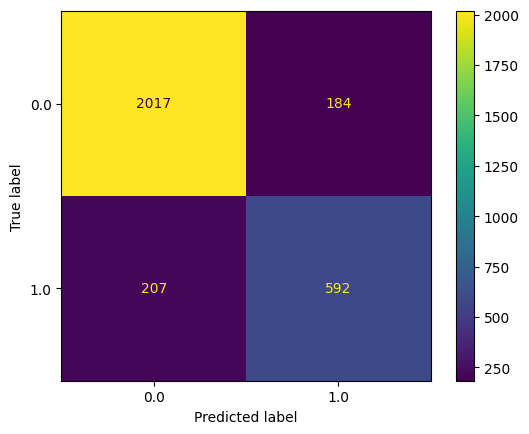

In [307]:
#Generate a confusion matrix of the reduced logistic regression model's predictions on a randomly selected, but consistent, 30% sample size of our total dataset.

if MLR_or_LR == 'LR':
    X_train, X_test, y_train, y_test = train_test_split(X_final_drop, Y_initial, test_size=0.3, random_state=0)
    LogR = LogisticRegression()
    LogR.fit(X_train, np.ravel(y_train))
    prediction = LogR.predict(X_test)
    print('Accuracy calculation:') 
    print(str(LogR.score(X_test, y_test) * 100) + ' percent accurate')
    print('')
    print('Confusion Matrix:')
    final_matrix = confusion_matrix(y_test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=final_matrix,
                                  display_labels=LogR.classes_)
    disp.plot()
    plt.show()

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

### E3: CODE

The code used to support and complete this analysis can be found throughout this .ipynb Jupyter notebook file. In addition, the submission will include an executable python script file containing the complete code and report created via the export function included in the Jupyter extension in VSCode.

### F1: RESULTS

The results of our analysis will first include the regression equation derived from our reduced logistic regression model. Next, We will interpret the coefficients of our final independent variables and provide a clear, concise description of how they influence our dependent variable. In addition, we will conduct a brief discussion of the statistical and practical significance of our model with regards to our identified research question. Finally, we will describe the apparent limitations of our analysis, and how these limitations might impact any business decisions predicated on the results of our analysis.

In [308]:
print(output_final.params)
coeff_list = str(output_final.params).split('\n')
coeff_dict = {}

for i in range(len(coeff_list)-1):
    coeff_dict1 = {coeff_list[i].split(' ')[0]:coeff_list[i].split(' ')[-1]}
    coeff_dict.update(coeff_dict1)


for key in coeff_dict.keys():
    coeff_dict[key] = float(coeff_dict[key])


const             -0.891396
Contract          -1.516707
StreamingTV        2.299353
StreamingMovies    2.721484
Tenure            -0.085122
dtype: float64


In [309]:
if LOGx == True:
    print('Raw coefficients:')
    print(output_final.params)
    coeff_list = str(output_final.params).split('\n')
    coeff_dict = {}

    for i in range(len(coeff_list)-1):
        coeff_dict1 = {coeff_list[i].split(' ')[0]:coeff_list[i].split(' ')[-1]}
        coeff_dict.update(coeff_dict1)


    for key in coeff_dict.keys():
        coeff_dict[key] = float(coeff_dict[key])

    if LOGx == True:
        X_vars_analysis = coeff_dict.copy()

        for key in X_vars_analysis:
            X_vars_analysis[key] = np.exp(X_vars_analysis[key]) - 1

        #We also subtracted 1 from the constant, which we didn't need to do!
        X_vars_analysis['const'] += 1
        print('')
        print('Actual percentage changes plus constant value:')
        print(X_vars_analysis)

if MLR_or_LR == 'LR':
    coeff_list = str(output_final.params).split('\n')
    coeff_dict = {}

    for i in range(len(coeff_list)-1):
        coeff_dict1 = {coeff_list[i].split(' ')[0]:coeff_list[i].split(' ')[-1]}
        coeff_dict.update(coeff_dict1)

    for key in coeff_dict.keys():
        coeff_dict[key] = float(coeff_dict[key])

    print("Raw coefficients with constant:")
    print(coeff_dict)

    X_vars_analysis = {}
    for key in coeff_dict.keys():
        X_vars_analysis1 = {key:coeff_dict[key]}
        X_vars_analysis.update(X_vars_analysis1)
    
    del  X_vars_analysis['const']

    odds_ratios = X_vars_analysis.copy()

    for key in X_vars_analysis:
        odds_ratios[key] = np.exp(X_vars_analysis[key])
        X_vars_analysis[key] = np.round((odds_ratios[key] - 1) * 100 , 4)
    

    print('Odds ratios:')
    print(odds_ratios)
    print('Actual percent changes to prediction odds:')
    print(X_vars_analysis)

Raw coefficients with constant:
{'const': -0.891396, 'Contract': -1.516707, 'StreamingTV': 2.299353, 'StreamingMovies': 2.721484, 'Tenure': -0.085122}
Odds ratios:
{'Contract': 0.2194332923380153, 'StreamingTV': 9.967731245957566, 'StreamingMovies': 15.202866566914935, 'Tenure': 0.9184002327380508}
Actual percent changes to prediction odds:
{'Contract': -78.0567, 'StreamingTV': 896.7731, 'StreamingMovies': 1420.2867, 'Tenure': -8.16}


#### Logistic Regression Equation:

$$
ln\frac{\hat{p}}{(1-\hat{p})} = -0.8914 - 1.5167(Contract) + 2.2994(StreamingTV) + 2.7215(StreamingMovies) - 0.08512(Tenure)
$$

(Larose & Larose, 2019, p. 188)

#### Interpreted Coefficients 

Based on the above equation and calculated odds ratios, we can state the following about the coefficients of the independent variables in our reduced model:

<br>-Contract: Keeping all things constant, for every increase in duration of customer contract type (from Month-to-Month to One Year to Two Year), we expect the customer's odds of discontinuing service in a given month to decrease by 78.0567%.
<br>-StreamingTV: Keeping all things constant, if the customer subscribes to the Streaming TV add-on, we expect the customer's odds of discontinuing service in a given month to increase by 896.7731%.
<br>-StreamingMovies: Keeping all things constant, if the customer subscribes to the Streaming Movies add-on, we expect the customer's odds of discontinuing service in a given month to increase by 1420.2867%.
<br>-Tenure: Keeping all things constant, for every month the customer stays with the provider up to the given month, we expect the customer's odds of discontinuing service in the given month to decrease by 8.16%.

#### Statistical and Practical Significance

The statistical significance of our reduced model is evident in the probability of its LLR-p value. A value below .05 indicates that the logistic regression model we have produced demonstrates a better predicitve fit of our data than a null model that possesses no predictive variables. Much like other statistical tests that return p values, values below this cutoff indicate that the predictions produced have less than a 5% chance of being the product of random chance compared to a null model. Our reduced model returns a value of 0.000, likely due to the number of decimal places displayed. This is substantially below the cutoff value, demonstrates that the results are extremely unlikely to be the result of random chance, and confirms that our model uses independent variables that possess a substantial degree of statistical significance in relation to the dependent variable.

The practical significance of the reduced model is also fairly high in relation to our research question. We have found two features that appear to mitigate a customer's odds of discontinuing service (Contract and Tenure), as well as two features whose presence drastically increase their odds of leaving (StreamingTV and StreamingMovies). This allows us to develop strategies that will hopefully boost the values of the former, thereby improving their mitigative effect, and also to re-evaluate the delivered services that are most strongly correlated with churned customers. The results are consistent with what we might logically conclude about mitigating factors, as longer contracts would be very likely to penalize early departure before their term limits have expired, and customers with a longer history at the organization are probably less likely to inconvenience themselves by completely transferring service to another organization. On the other hand, the massive impact that our two identified services has on a customer's odds of leaving indicate that they should be the basis for further investigation if the organization intends to slow its rate of customer churn.

#### Limitations of Analysis

Despite the promising statistical results of our reduced logistic regression, it does possess some important limitations. First, our confusion matrix demonstrates that the model is far more accurate in its predictions of who will not churn rather than who will churn. This may be due in part to the relative imbalance of churned versus non-churned customers in the dataset itself, thereby skewing the predictive ability of the model. There are a few different ways to potentially mitigate this in future analysis, and these possibilities will be included in our recommendations. First, we can change the ratios of the values of our dependent variables used in our sampling so that the values of each are more balanced. Two methods to achieve this would be filtering out rows containing a 'No' value in Churn until the sum of 'No' values are equal to the sum of 'Yes' values, or incorporating more data until we have a total of 5,000 observations with a 'Yes' value in Churn. While the latter method seems more appropriate at a glance, it may actually be less appropriate due to the nature of what our Churn variable actually means, as we will explain in the next limitation.

The second limitation relates specifically to the data definition of our Churn variable. The predictive power of this model cannot be confidently extended to datasets generated from other months as there may be drastic changes in the factors that predict customer churn over time, and values in our Churn column only represent whether a customer discontinued service in the past month. This makes it potentially inappropriate to mix data from other months (which would come to bear if we opted to incorporate more data to balance the 'Yes' and 'No' values as we described above), or conflate results performed on other months' datasets with the results of this particular month.  In our analysis, for example, it is not possible to discern whether the predictive power of the StreamingTV and StreamingMovies services was due to operational problems resulting in customer dissatisfaction, adjustments to market prices of these services relative to the organization's price points, or some other factor. We cannot determine causality from our results, or even whether the underlying causes of customer departure were localized to the past month. We can only conclude that these features demonstrate a strong correlation with the occurrence customers leaving within the past month. So, while our analysis does answer our research question, its results demand further research and analysis in order to determine an appropriate course of action.

### F2: RECOMMENDATIONS

Based on the results of our analysis and its limitations, the recommendations that we can make to the organizations are mostly centered on further analysis rather than actionable steps to mitigate churn. However, one course of action should be considered in the interim. Due to the demonstrated mitigative effect of contract length on customer churn, it may be wise for the organization to consider offering additional incentives to start or renew a contract. These could take the form of discounted rates, credit toward products and devices, or even waived fees on support services. This approach could then be expanded into a marketing campaign in order to drive customer traffic to these contracts.

Beyond immediate strategic decisions, the organization should also prioritize additional analyses of the two services identified as predictive factors in customer churn. At this point in time, the reasons behind these statistical relationships are unclear. One way to gather more context would be to design and implement exit surveys for departing customers, and design questions specifically related to satisfaction with the quality, reliability, content selection, interface, and pricing of the StreamingTV and StreamingMovies services. The results of this survey could then be analyzed to better understand the practical significance of these independent variables, and more importantly, how to reduce their statistical impact on customer churn in order to retain more customers. The organization might also consider performing logistic regressions on both of these features, making them the dependent variables in their own discrete analyses. The results of these analyses would provide further insight into the demographic indicators most affected by whatever factors are afflicting these services, allowing infrastructural, operational, and marketing efforts to be tailored to fit those identified indicators.

### G: PANOPTO DEMONSTRATION

A brief demonstration video of this code, including a description of the software environment used to develop it, has been recorded via Panopto and submitted for evaluation in conjunction with this Jupyter notebook per instructions in the WGU submission portal.

The software used in the production of this code is as follows:

Operating System: Windows 11 Home<br>
Code Editor and Integrated Development Environment: Microsoft Visual Studio Code<br>
Browser used for research and submission: Google Chrome<br>
Spreadsheet editor: Microsoft Excel

### H: SOURCES OF THIRD PARTY CODE

SciKitLearn-developers. (2007-2023). https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html.

Pandas via NumFOCUS, Inc. (2023). https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

Perktold, J., Seabold, S., Taylor, J., Statsmodels-developers. (2009-2023). https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html.

Perktold, J., Seabold, S., Taylor, J., Statsmodels-developers. (2009-2023). https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

Tallon, K. (2018). https://stackoverflow.com/questions/45740920/statsmodels-how-can-i-get-statsmodel-to-return-the-pvalue-of-an-ols-object

### I: SOURCES

Larose, C. D., & Larose, D. T. (2019). Data science using Python and R. ISBN-13: 978-1-119-52684-1.

Middleton, K. (2022) "D208 - Webinar: Getting Started with D208". Western Governors University, College of Information Technology. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15e09c73-c5aa-439d-852f-af47001b8970.

Sewell, W. (2022). "D208 Predictive Modeling." Western Governors University, College of Information Technology. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=567da34c-96e3-44c7-a160-ae3100f9433d.